In [1]:
# import important libraries
import numpy as np 
import pandas as pd 
from imputer import *

In [2]:
import missingno as msno
%matplotlib inline

In [3]:
# import the data
data_path = "data/example_data.fthr"
data = pd.read_feather(data_path)
data.head(5)

,A2ME,AC,AT,ATO,B2M,BETA_d,BETA_m,C2A,CF2B,CF2P,...,S2P,SGA2S,SPREAD,SUV,TURN,VAR,return,date,permno,monthly_update
0,-0.341989,0.073275,-0.000122,0.269502,-0.170260,-0.276312,-0.418199,0.170995,0.277532,0.155130,...,-0.056347,-0.171998,-0.265957,0.178494,-0.024265,-0.087374,-0.100016,20200131.0,10026.0,0.0
1,-0.284909,0.372676,-0.426805,0.400604,-0.264821,-0.394166,-0.489295,-0.007839,0.430341,-0.117820,...,0.271176,-0.250800,0.301578,-0.290490,-0.090963,0.281565,0.607407,20200131.0,10028.0,0.0
2,-0.038462,-0.033880,0.119584,0.413689,-0.045076,0.087804,-0.076997,0.039441,0.350625,0.129602,...,0.294991,-0.460744,-0.100765,-0.376418,0.057495,-0.253961,-0.075643,20200131.0,10032.0,0.0
3,-0.221705,0.043019,-0.421665,0.262204,-0.067859,-0.462474,-0.349026,0.177119,0.096272,0.011537,...,0.102259,-0.225502,-0.244442,0.244871,-0.209539,-0.393663,-0.098592,20200131.0,10044.0,0.0
4,-0.077658,-0.493697,-0.041983,0.290891,-0.438021,NaN,0.181856,-0.123224,-0.486264,-0.056456,...,0.245642,NaN,-0.011834,-0.131909,0.046259,-0.186270,-0.115176,20200131.0,10051.0,0.0


In [4]:
data = data.drop(['monthly_update'], axis=1)

In [5]:
data.columns

Index(['A2ME', 'AC', 'AT', 'ATO', 'B2M', 'BETA_d', 'BETA_m', 'C2A', 'CF2B',
       'CF2P', 'CTO', 'D2A', 'D2P', 'DPI2A', 'E2P', 'FC2Y', 'HIGH52', 'INV',
       'IdioVol', 'LEV', 'ME', 'NI', 'NOA', 'OA', 'OL', 'OP', 'PCM', 'PM',
       'PROF', 'Q', 'R12_2', 'R12_7', 'R2_1', 'R36_13', 'R60_13', 'RNA', 'ROA',
       'ROE', 'RVAR', 'S2P', 'SGA2S', 'SPREAD', 'SUV', 'TURN', 'VAR', 'return',
       'date', 'permno'],
      dtype='object')

A2ME: Assets to Market Equity – A measure of the total assets of a firm relative to its market capitalization.

AC: Accruals – A metric related to accounting accruals, representing non-cash accounting items that can be used to assess earnings quality.

AT: Assets Total – Total assets of the company.

ATO: Asset Turnover – A financial ratio measuring the efficiency of a company's assets in generating sales.
 
B2M: Book-to-Market Ratio – The ratio of the book value of equity to its market value, often used as a value factor.
 
BETA_d: Daily Beta – The sensitivity of the stock’s return to market movements, estimated using daily data.

BETA_m: Monthly Beta – The sensitivity of the stock’s return to market movements, estimated using monthly data.

C2A: Cash to Assets – The proportion of a company’s total assets that is held in cash or cash equivalents.

CF2B: Cash Flow to Book Value – The ratio of cash flow to the book value of equity, often used to assess profitability and value.

CF2P: Cash Flow to Price – The ratio of cash flow per share to the stock price, used as a valuation metric.

CTO: Cash Turnover – A measure of how efficiently cash is used to generate sales.

D2A: Debt to Assets – A leverage ratio that shows the proportion of a company's assets that are financed by debt:
 
D2P: Debt to Price – A measure of the debt level relative to the market price of equity.

DPI2A: Dividends plus Interest to Assets – The sum of dividend payments and interest relative to total assets, indicating cash distribution to investors.

E2P: Earnings to Price (Earnings Yield) – The inverse of the P/E ratio, used as a valuation metric:
​
FC2Y: Free Cash Flow to Yield – The ratio of free cash flow to yield, representing profitability and cash flow generation.

HIGH52: 52-Week High – The highest price reached by the stock in the past 52 weeks.

INV: Inventory – The value of the company's inventory.

IdioVol: Idiosyncratic Volatility – The volatility of the stock's returns that cannot be explained by market factors, representing firm-specific risk.

LEV: Leverage – A measure of financial leverage, often calculated as:

ME: Market Equity (Market Capitalization) – The total market value of a company's outstanding shares.

NI: Net Income – The profit of the company after all expenses and taxes.

NOA: Net Operating Assets – The value of operating assets minus operating liabilities, indicating the net assets tied up in operations.

OA: Operating Assets – Assets used in the core operations of the business.

OL: Operating Liabilities – Liabilities arising from the core operations of the business.

OP: Operating Profit – The profit earned from a firm's core business operations.

PCM: Price to Cashflow Multiple – A valuation metric that shows the multiple of cash flow that investors are willing to pay.

PM: Profit Margin – A measure of profitability that shows the percentage of revenue that turns into profit:
 
PROF: Profitability – A general measure of a company’s profitability, which could be Return on Assets, Return on Equity, or another profitability metric.

Q: Tobin's Q – The ratio of the market value of a firm to the replacement cost of its assets, often used as a valuation measure.

R12_2: 12-Month Return (Ending at Month 2) – The total return over a 12-month period ending at month 2, used to assess past performance.

R12_7: 12-Month Return (Ending at Month 7) – The total return over a 12-month period ending at month 7, indicating momentum or performance.

R2_1: 2-Month Return (Ending at Month 1) – The total return over the past 2 months ending at month 1.

R36_13: 36-Month Return (Ending at Month 13) – The total return over the past 36 months ending at month 13.

R60_13: 60-Month Return (Ending at Month 13) – The total return over the past 60 months ending at month 13.

RNA: Return on Net Assets – A measure of profitability calculated as:
 
ROA: Return on Assets – A measure of how efficiently a company is using its assets to generate profit:
 
ROE: Return on Equity – A measure of financial performance calculated as.
 
RVAR: Return Variance – The variance of returns over a certain period, used to assess risk.

S2P: Sales to Price – The ratio of sales per share to the share price, often used as a valuation metric.

SGA2S: Selling, General, and Administrative to Sales – A measure of overhead efficiency relative to sales:
 
SPREAD: Bid-Ask Spread – The difference between the bid and ask price of a stock, used as a measure of liquidity.

SUV: Sales, Unadjusted Volume – The raw volume of sales without any adjustments.

TURN: Turnover Ratio – A measure of how frequently assets are turned over, often calculated as:
 
VAR: Variance – A statistical measure of the dispersion of returns, often used as a risk indicator.

return: Stock Return – The return on the stock over a given period, typically expressed as a percentage.

date: Date – The date of the record, used to track time-series data.

permno: Permanent Number – A unique identifier for a company in the dataset, commonly used in finance databases like CRSP.

<Axes: >

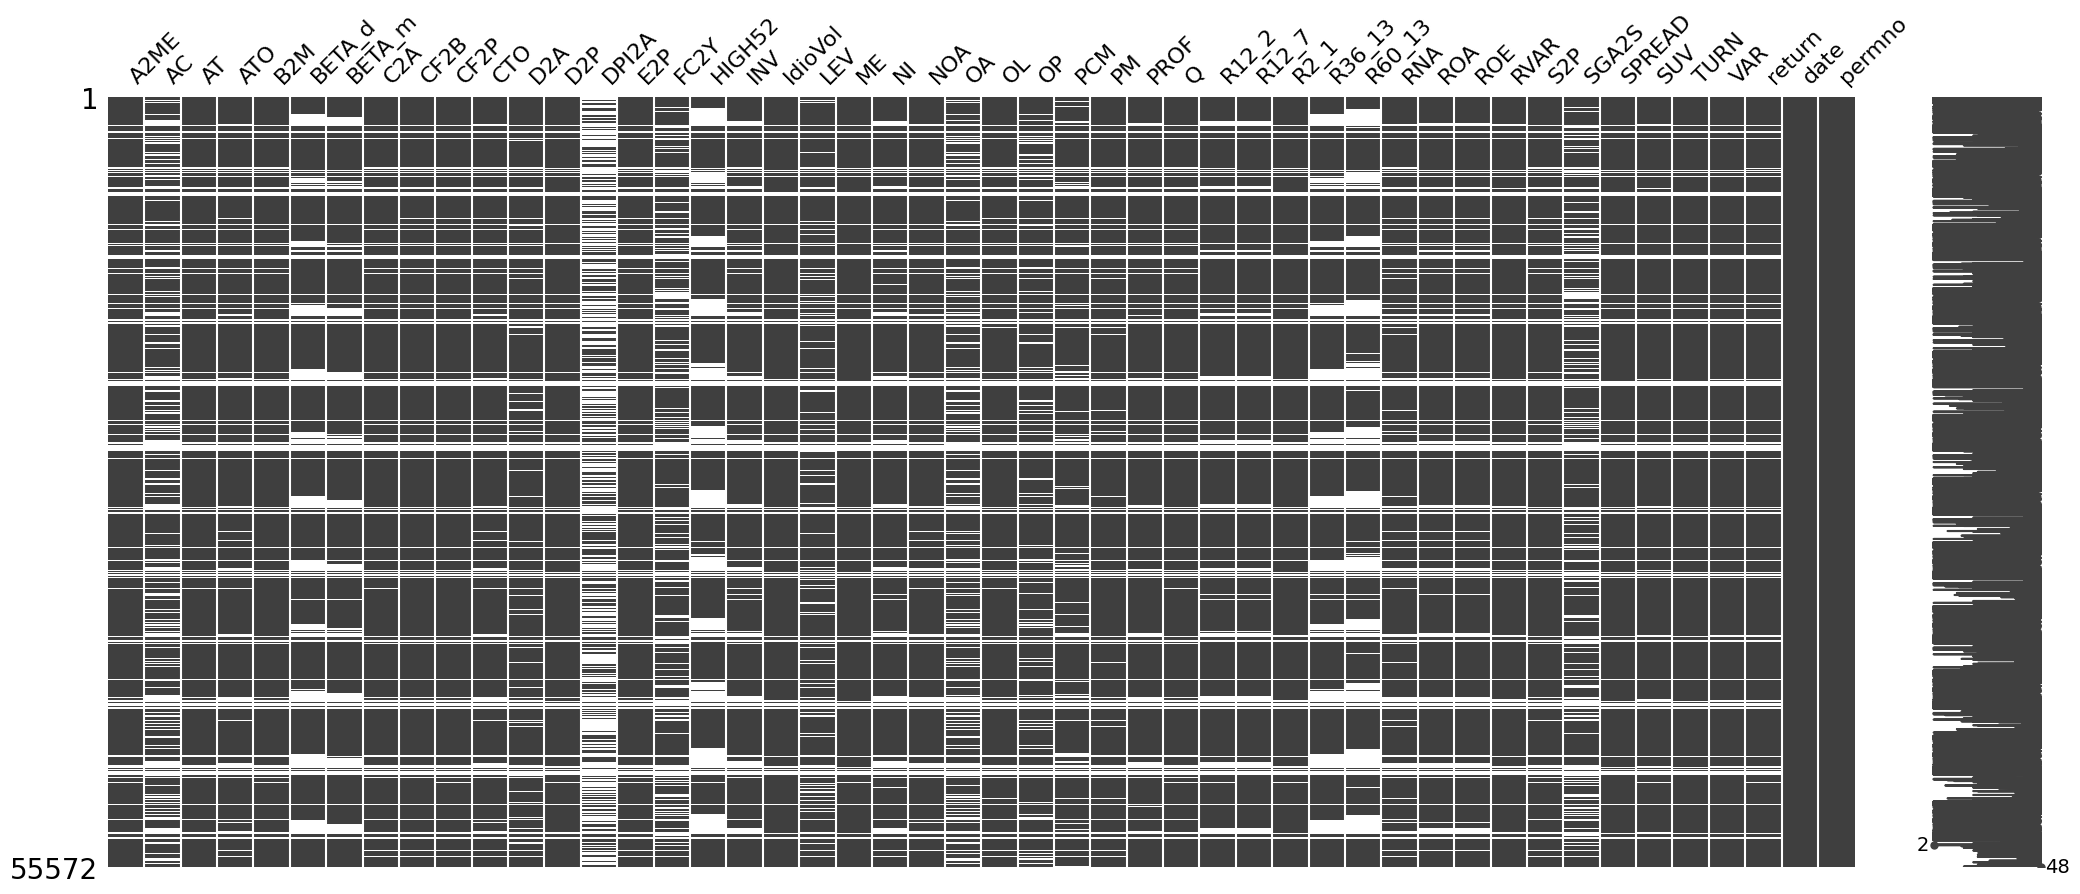

In [6]:
msno.matrix(data)

<Axes: >

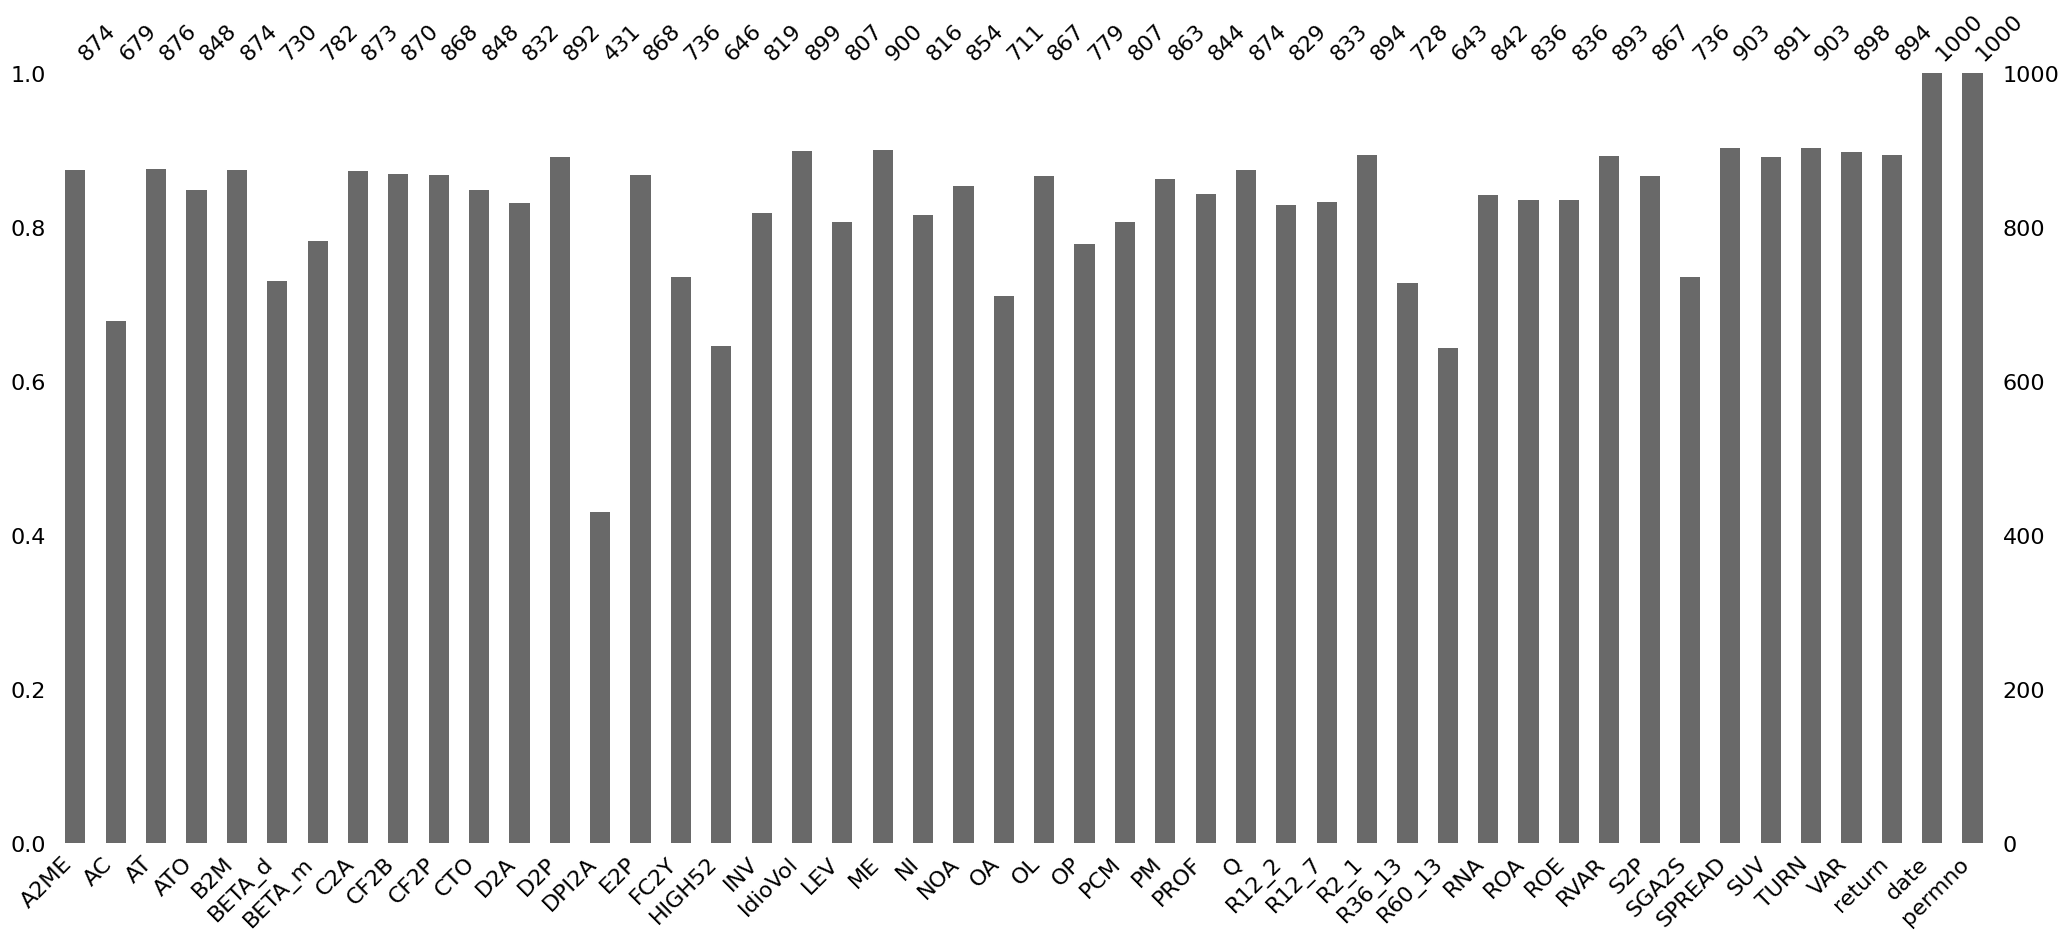

In [7]:
msno.bar(data.sample(1000))

<Axes: >

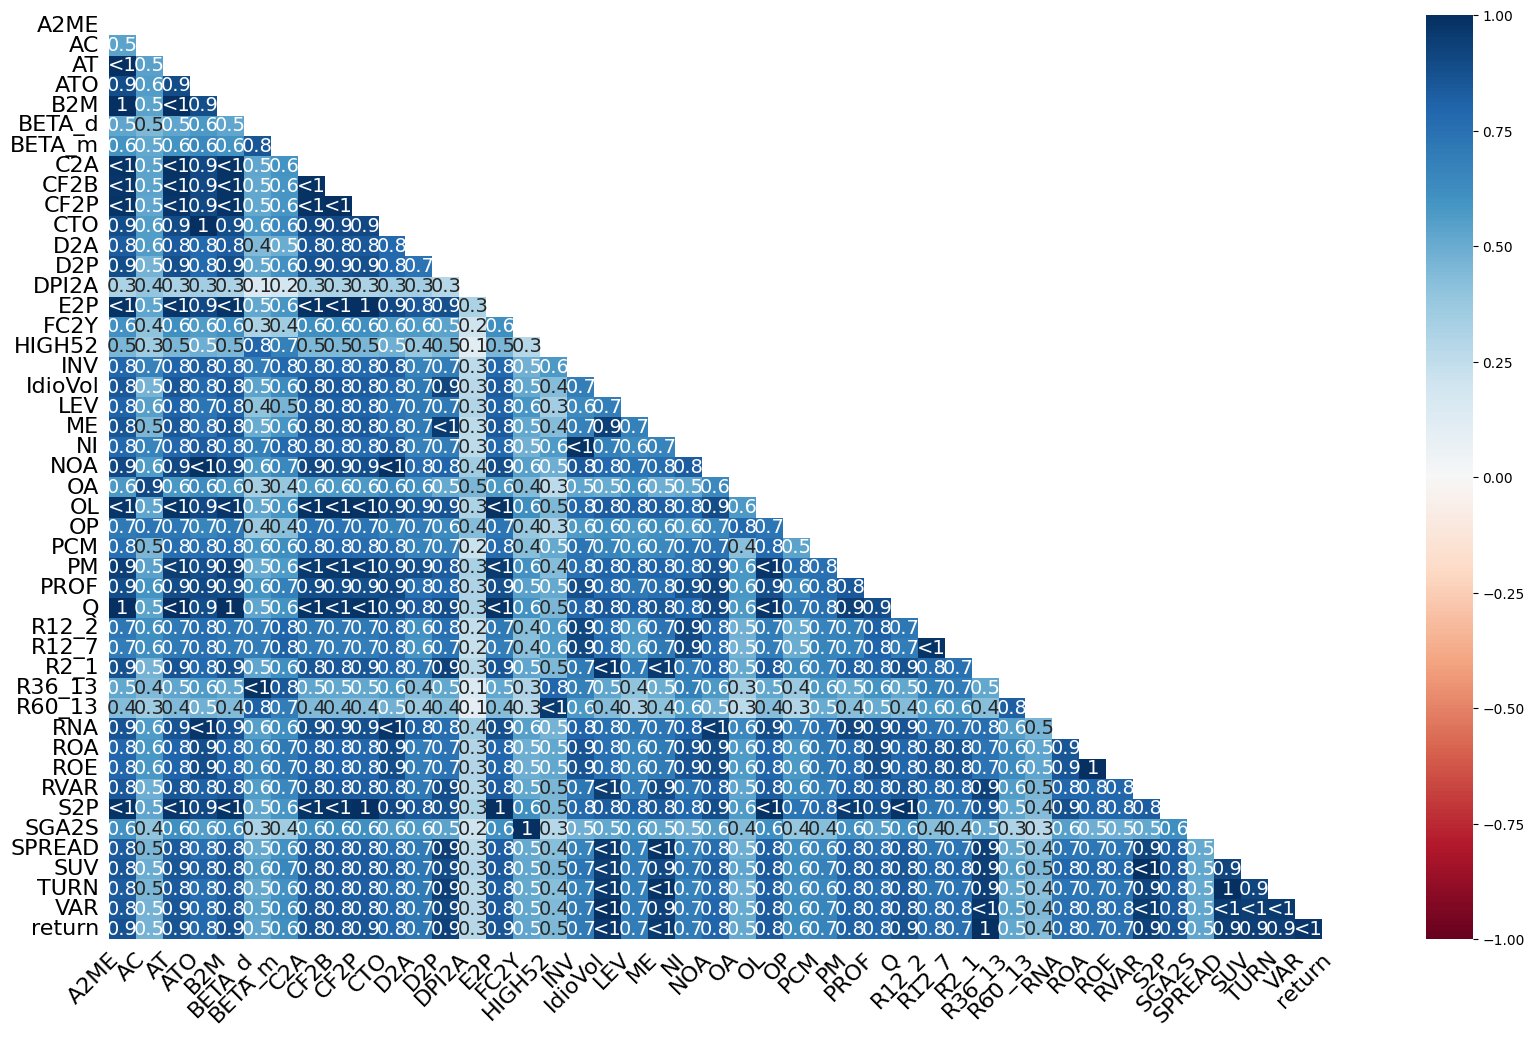

In [8]:
msno.heatmap(data)

<Axes: >

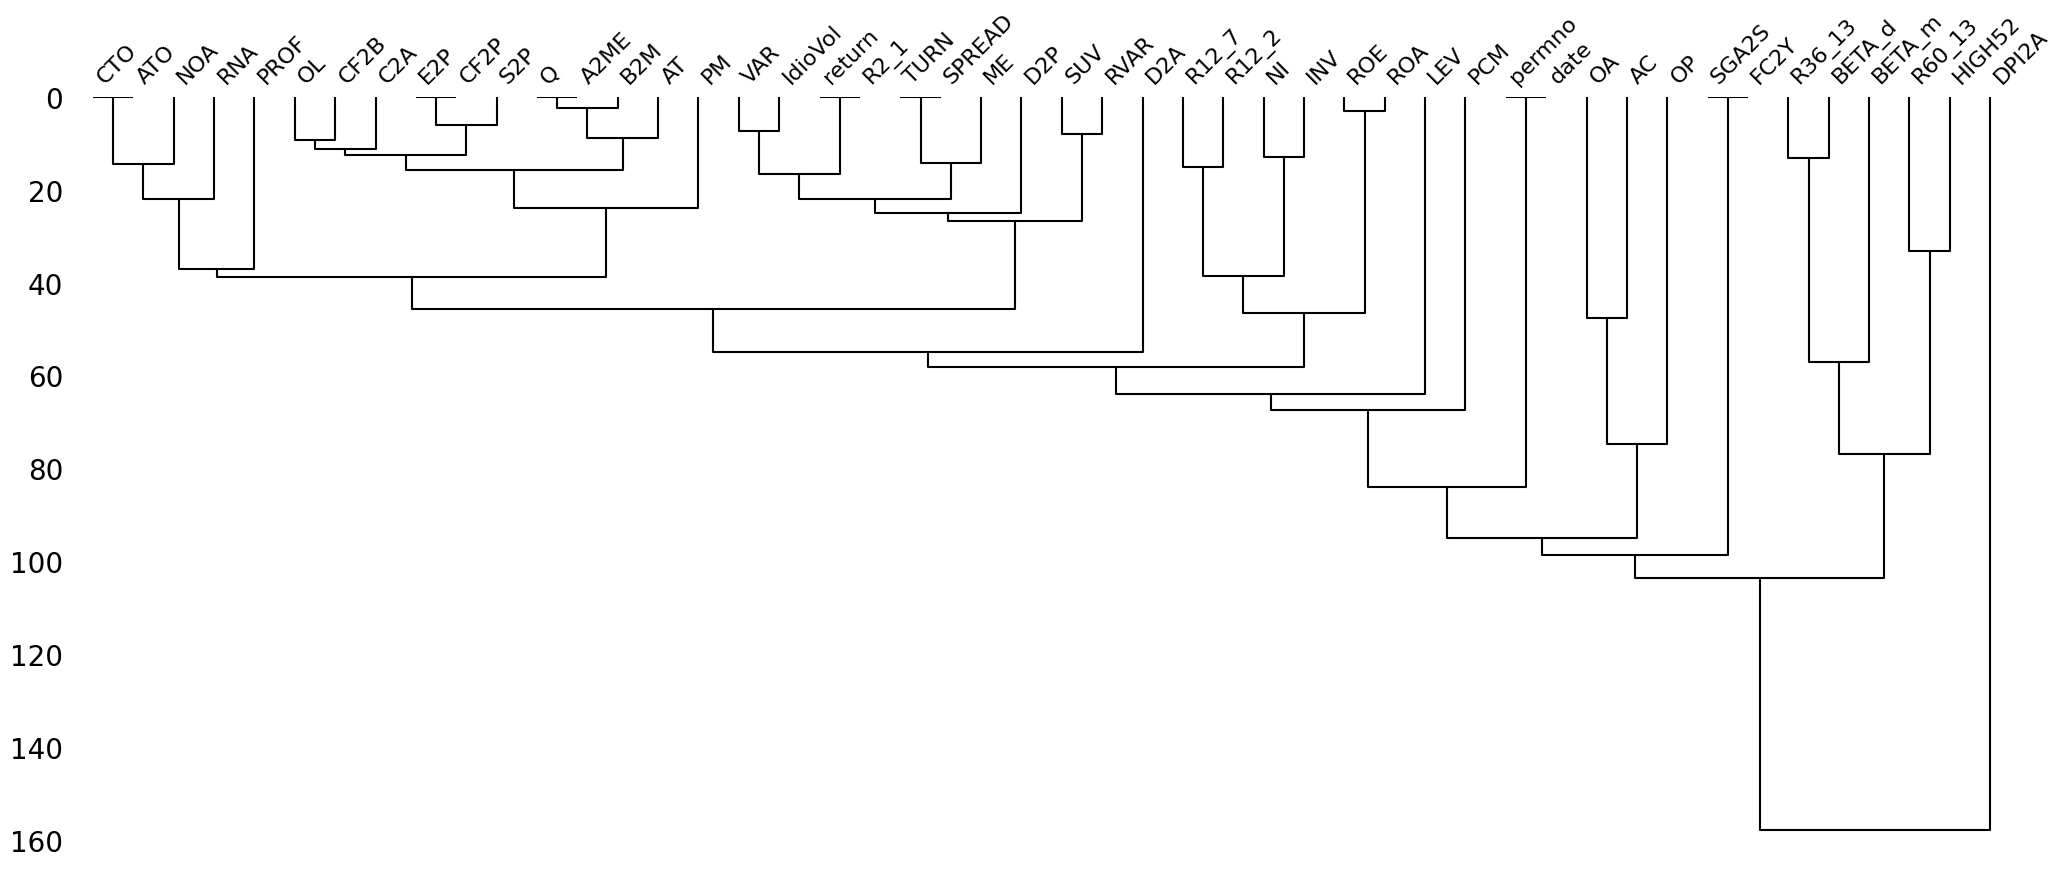

In [9]:
msno.dendrogram(data)

In [10]:
# OA: Operating Assets
# ME: Market Equity or capitalization
# return
# PROF: Profitability

asset_data = data.query('permno == 10032.0')

In [11]:
asset_data

,A2ME,AC,AT,ATO,B2M,BETA_d,BETA_m,C2A,CF2B,CF2P,...,RVAR,S2P,SGA2S,SPREAD,SUV,TURN,VAR,return,date,permno
2,-0.038462,-0.033880,0.119584,0.413689,-0.045076,0.087804,-0.076997,0.039441,0.350625,0.129602,...,-0.201374,0.294991,-0.460744,-0.100765,-0.376418,0.057495,-0.253961,-0.075643,20200131.0,10032.0
4597,-0.048086,-0.030451,0.119549,0.414379,-0.049068,0.089065,-0.085346,0.038858,0.352970,0.119223,...,-0.301495,0.287856,-0.461001,-0.244025,-0.314296,-0.128346,-0.250480,-0.067070,20200229.0,10032.0
9189,-0.062994,-0.041733,0.113389,0.414530,-0.055199,0.168917,-0.098796,0.039773,0.047076,0.078674,...,-0.276519,0.256810,-0.458778,-0.165949,0.069602,-0.137255,-0.119516,-0.177694,20200331.0,10032.0
13776,-0.054482,-0.053968,0.112760,0.414465,-0.051127,0.168327,-0.100055,0.039318,0.041171,0.071216,...,-0.246988,0.263289,-0.459026,-0.227425,0.064976,-0.090419,-0.130795,0.149010,20200430.0,10032.0
18359,-0.044800,-0.057393,0.112831,0.414293,-0.033747,0.167057,-0.112595,0.037776,0.044348,0.069261,...,-0.292371,0.269978,-0.459226,-0.301631,-0.215461,-0.148117,-0.130743,0.024406,20200531.0,10032.0
22933,-0.022443,0.016703,0.132713,0.411128,-0.031143,0.139402,-0.113402,0.013467,0.068243,0.053374,...,-0.311079,0.277560,-0.464191,-0.373714,0.262228,-0.022363,-0.264947,0.098723,20200630.0,10032.0
27519,-0.024957,0.020000,0.132974,0.410146,-0.030236,0.158658,-0.099242,0.009568,0.069605,0.047355,...,-0.419030,0.275535,-0.464412,-0.236177,0.297766,0.069113,-0.225636,0.052863,20200731.0,10032.0
32118,-0.025240,0.018461,0.133530,0.409987,-0.034958,0.160992,-0.088937,0.008346,0.067919,0.053831,...,-0.290872,0.284077,-0.464412,-0.395774,-0.306623,-0.131529,-0.258687,0.023960,20200831.0,10032.0
36731,-0.008301,-0.137081,0.134967,0.414963,-0.020020,0.173888,-0.069959,0.019873,0.027730,0.087818,...,-0.234777,0.305923,-0.467638,-0.321176,-0.135991,-0.087529,-0.312247,-0.071513,20200930.0,10032.0
41379,-0.001711,-0.134810,0.133480,0.415340,-0.013196,0.182614,-0.000404,0.015617,0.028362,0.102106,...,-0.317312,0.311857,-0.467921,-0.364840,-0.123713,-0.151417,-0.384362,-0.015432,20201031.0,10032.0


<Axes: >

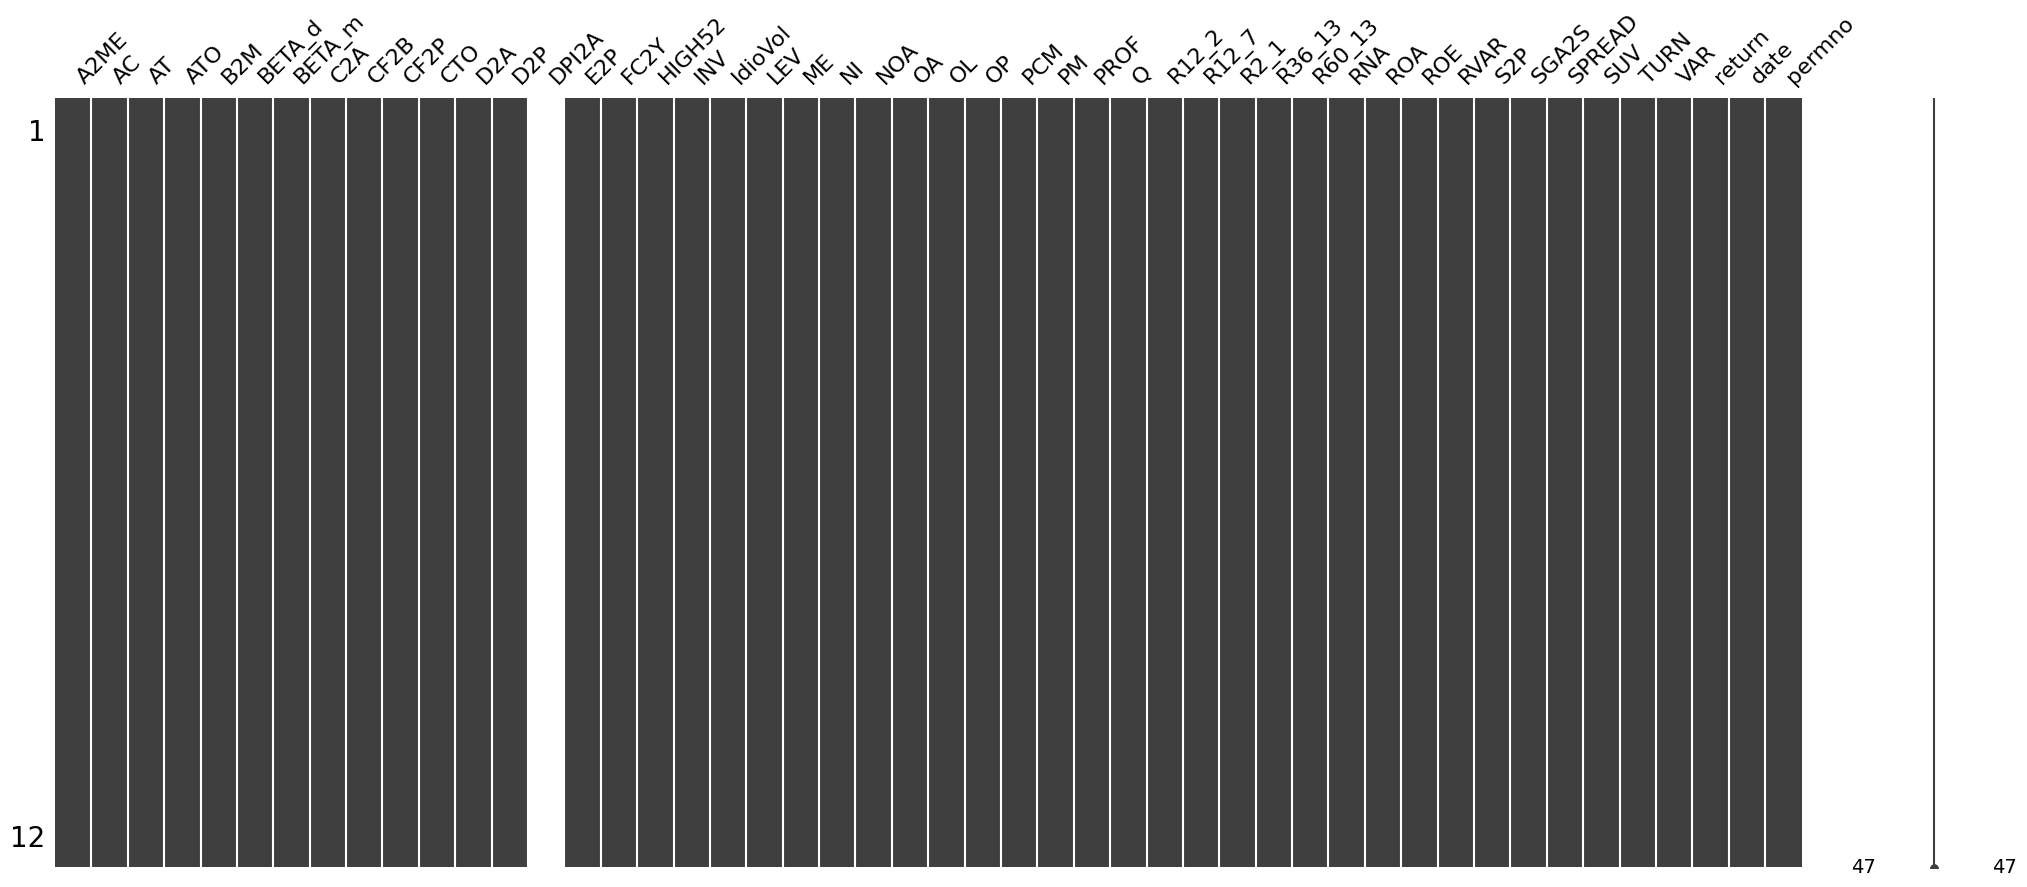

In [12]:
msno.matrix(asset_data)

In [13]:
print(data['permno'].unique()[200:220])

[12494. 12495. 12497. 12500. 12502. 12503. 12515. 12521. 12527. 12540.
 12541. 12542. 12554. 12556. 12558. 12559. 12569. 12570. 12573. 12577.]


In [14]:
asset_data = data.query('permno == 12569.0')
asset_data

,A2ME,AC,AT,ATO,B2M,BETA_d,BETA_m,C2A,CF2B,CF2P,...,RVAR,S2P,SGA2S,SPREAD,SUV,TURN,VAR,return,date,permno
216,-0.171240,0.039868,-0.381273,-0.435078,0.114405,0.151129,0.415454,-0.058060,-0.177459,-0.268287,...,0.157508,-0.500000,0.413056,0.252570,0.285421,-0.388358,0.152424,-0.176870,20200131.0,12569.0
4811,-0.125859,0.042758,-0.381186,-0.435029,0.172473,0.105232,0.419045,-0.057490,-0.176240,-0.276057,...,0.176073,-0.500000,0.412980,0.341778,0.068220,-0.373088,0.202450,-0.194993,20200229.0,12569.0
9403,-0.086215,0.029673,-0.381670,-0.434138,0.214497,-0.065307,0.403120,-0.108943,-0.103568,-0.261752,...,0.214802,-0.499752,0.419039,0.211621,-0.098794,-0.433046,-0.085951,-0.278632,20200331.0,12569.0
13988,-0.200594,0.015556,-0.381800,-0.434843,0.058307,-0.039701,0.442318,-0.113007,-0.107143,-0.249380,...,0.021687,-0.499752,0.419240,0.256647,0.025362,-0.426946,-0.079390,0.666244,20200430.0,12569.0
18570,-0.216307,0.014467,-0.381595,-0.434963,0.024318,-0.067702,0.443566,-0.114565,-0.104472,-0.247078,...,0.000966,-0.499751,0.419048,-0.061765,0.315146,-0.399976,-0.155280,0.202587,20200531.0,12569.0
23143,-0.219156,0.050421,-0.379530,-0.440081,0.022315,-0.117707,0.440857,-0.163565,-0.080005,-0.228344,...,-0.031205,-0.499509,0.413414,0.179024,-0.126634,-0.440923,-0.136451,0.103531,20200630.0,12569.0
27728,-0.276740,0.052188,-0.379293,-0.440182,-0.050639,0.004248,0.449093,-0.169284,-0.078934,-0.217343,...,0.051758,-0.499508,0.413235,0.439943,0.478393,-0.156101,0.276764,0.318959,20200731.0,12569.0
32326,-0.296602,0.049750,-0.378743,-0.440834,-0.070901,-0.023628,0.442516,-0.170103,-0.080201,-0.217911,...,0.319367,-0.499507,0.412941,0.271605,0.346024,-0.263295,0.331057,0.113043,20200831.0,12569.0
36939,-0.293213,0.003790,-0.383199,-0.442468,-0.075439,0.004098,0.448579,-0.192270,-0.219521,-0.212329,...,0.335620,-0.499266,0.402041,0.322588,-0.263912,-0.260000,0.279366,-0.054687,20200930.0,12569.0
41587,-0.276149,0.004747,-0.383358,-0.443391,-0.046676,0.018961,0.457693,-0.194973,-0.221271,-0.214496,...,0.290053,-0.499265,0.402596,0.211565,-0.482994,-0.368788,0.301225,-0.082645,20201031.0,12569.0


<Axes: >

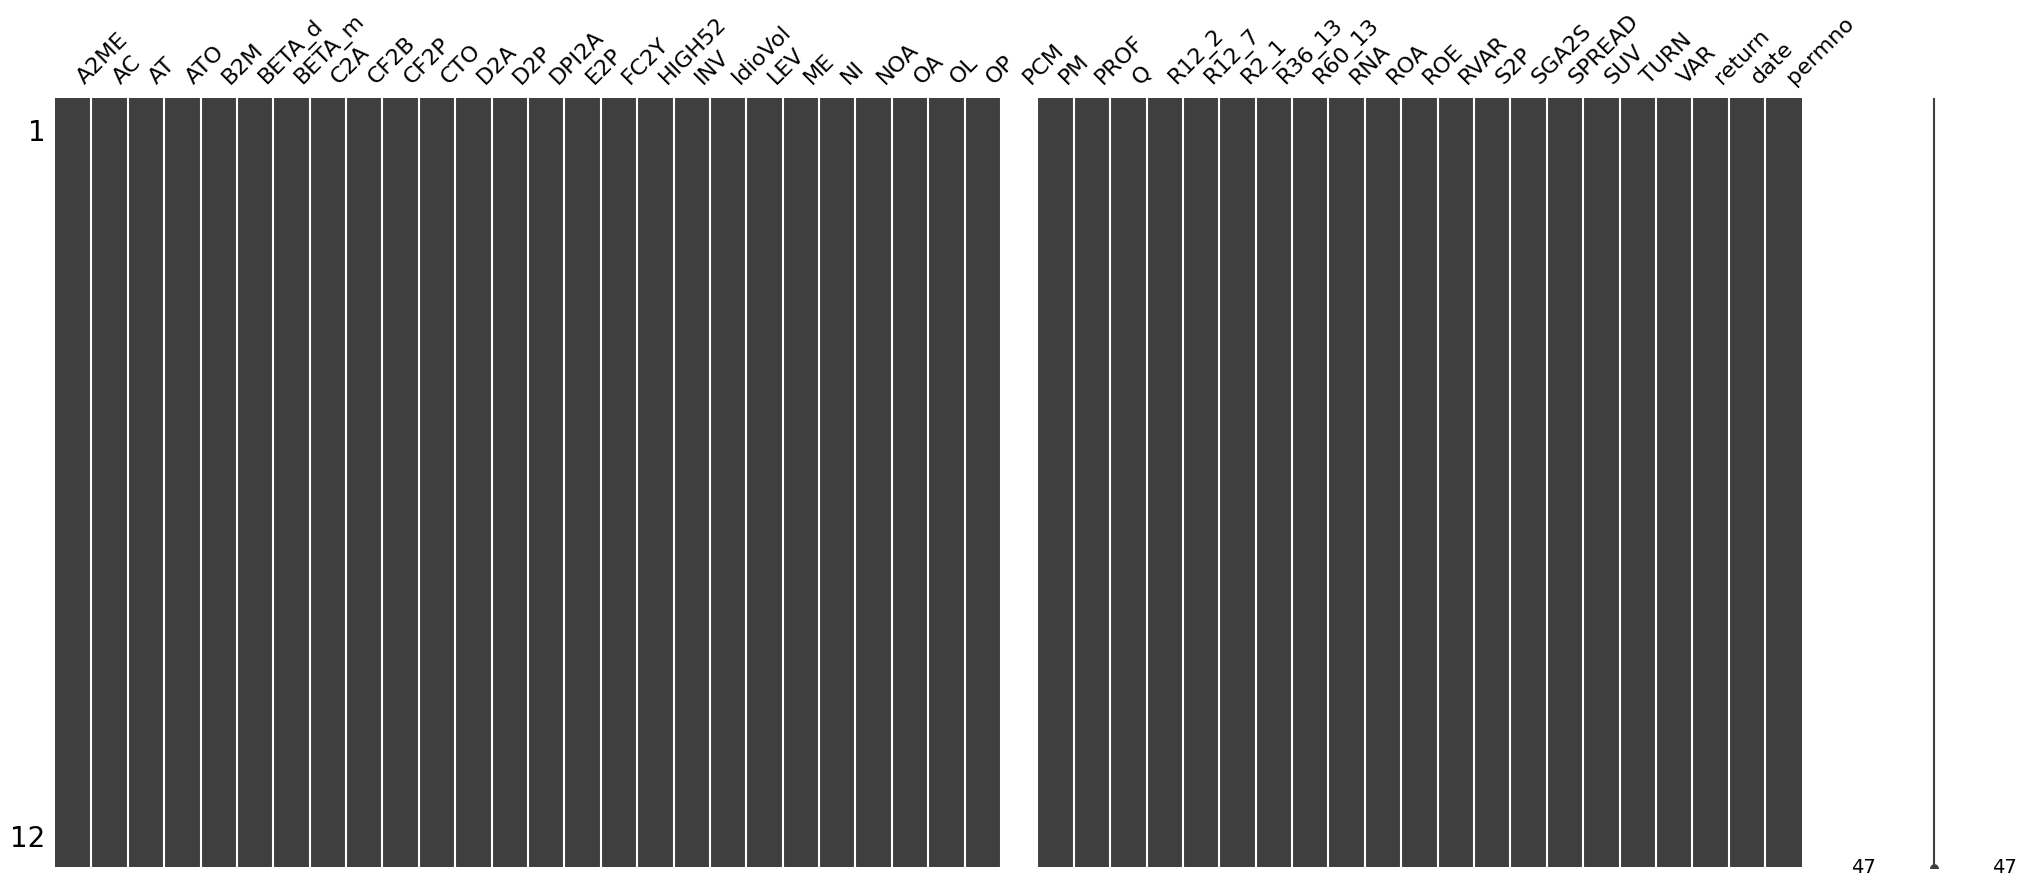

In [15]:
msno.matrix(asset_data)

In [16]:
asset_data = data.query('permno == 12345.0')
asset_data

,A2ME,AC,AT,ATO,B2M,BETA_d,BETA_m,C2A,CF2B,CF2P,...,RVAR,S2P,SGA2S,SPREAD,SUV,TURN,VAR,return,date,permno
167,0.002205,0.215726,0.429988,0.257675,-0.085497,0.311492,0.190091,-0.262861,-0.271646,0.402798,...,-0.396602,0.264056,-0.477028,-0.188023,0.400072,0.133517,-0.193951,-0.175910,20200131.0,12345.0
4762,-0.003435,0.218208,0.430181,0.259003,-0.081207,0.321576,0.169868,-0.262932,-0.271478,0.396018,...,-0.325133,0.259095,-0.477008,-0.178298,-0.416445,-0.009321,-0.121758,-0.068713,20200229.0,12345.0
9354,0.038291,0.336877,0.431077,0.253142,-0.055446,0.431318,0.195950,-0.234437,0.305500,0.407224,...,-0.286885,0.257058,-0.473903,-0.085366,0.202774,0.191774,0.112803,-0.305486,20200331.0,12345.0
13941,0.034423,0.331746,0.431009,0.253962,-0.056821,0.427337,0.170312,-0.241840,0.302827,0.403970,...,-0.058313,0.258818,-0.473872,-0.186946,-0.218841,0.075569,0.116142,0.167641,20200430.0,12345.0
18523,0.028667,0.330843,0.430642,0.254726,-0.063524,0.429367,0.177754,-0.242878,0.304720,0.400025,...,-0.084742,0.251556,-0.473810,-0.212161,-0.333293,-0.023387,0.127616,0.100259,20200531.0,12345.0
23096,0.043782,0.391040,0.430950,0.230866,-0.062285,0.423190,0.177699,-0.202253,-0.143225,0.402577,...,-0.072569,0.245151,-0.472116,-0.098421,-0.184504,-0.060153,0.013500,0.047208,20200630.0,12345.0
27681,0.070199,0.391875,0.430815,0.233216,-0.029990,0.421184,0.163688,-0.208292,-0.142033,0.410209,...,-0.234788,0.265937,-0.472059,-0.260010,-0.426196,-0.113441,-0.048008,-0.048691,20200731.0,12345.0
32280,0.067840,0.391740,0.430535,0.234008,-0.040374,0.418403,0.160521,-0.209622,-0.143331,0.411308,...,-0.192345,0.265097,-0.472059,-0.163343,-0.304689,-0.120845,-0.099089,0.064140,20200831.0,12345.0
36893,0.051025,0.405243,0.432455,0.222937,-0.084229,0.417155,0.143843,-0.155938,-0.273760,0.403865,...,-0.241516,0.236417,-0.470554,-0.102118,0.415442,0.048706,-0.101144,0.076512,20200930.0,12345.0
41541,0.056207,0.407595,0.432406,0.220495,-0.078935,0.418320,0.131636,-0.159834,-0.275550,0.408178,...,-0.178862,0.246693,-0.470545,-0.104041,0.008743,0.007431,-0.012482,-0.028940,20201031.0,12345.0


<Axes: >

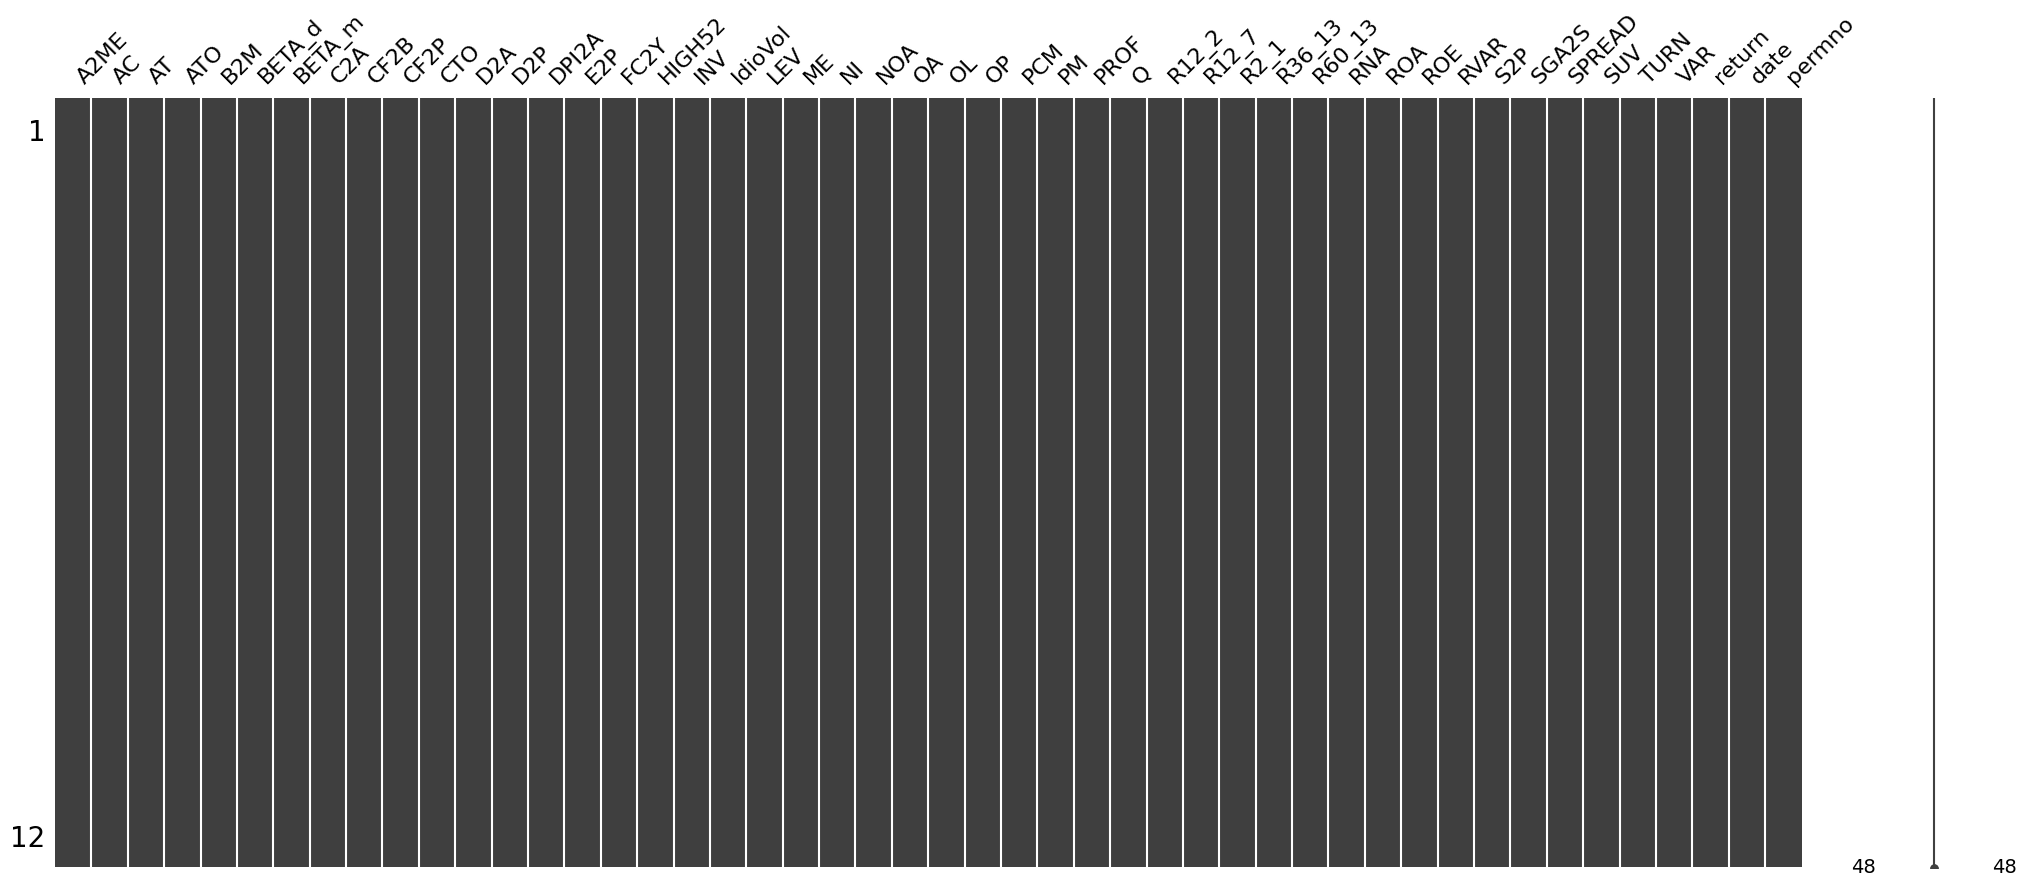

In [17]:
msno.matrix(asset_data)

In [18]:
asset_data = data.query('permno == 12394.0')
asset_data

,A2ME,AC,AT,ATO,B2M,BETA_d,BETA_m,C2A,CF2B,CF2P,...,RVAR,S2P,SGA2S,SPREAD,SUV,TURN,VAR,return,date,permno
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200131.0,12394.0
4774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200229.0,12394.0
9366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200331.0,12394.0
13953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200430.0,12394.0
18535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200531.0,12394.0
23108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200630.0,12394.0
27693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200731.0,12394.0
32292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200831.0,12394.0
36905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200930.0,12394.0
41553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201031.0,12394.0


<Axes: >

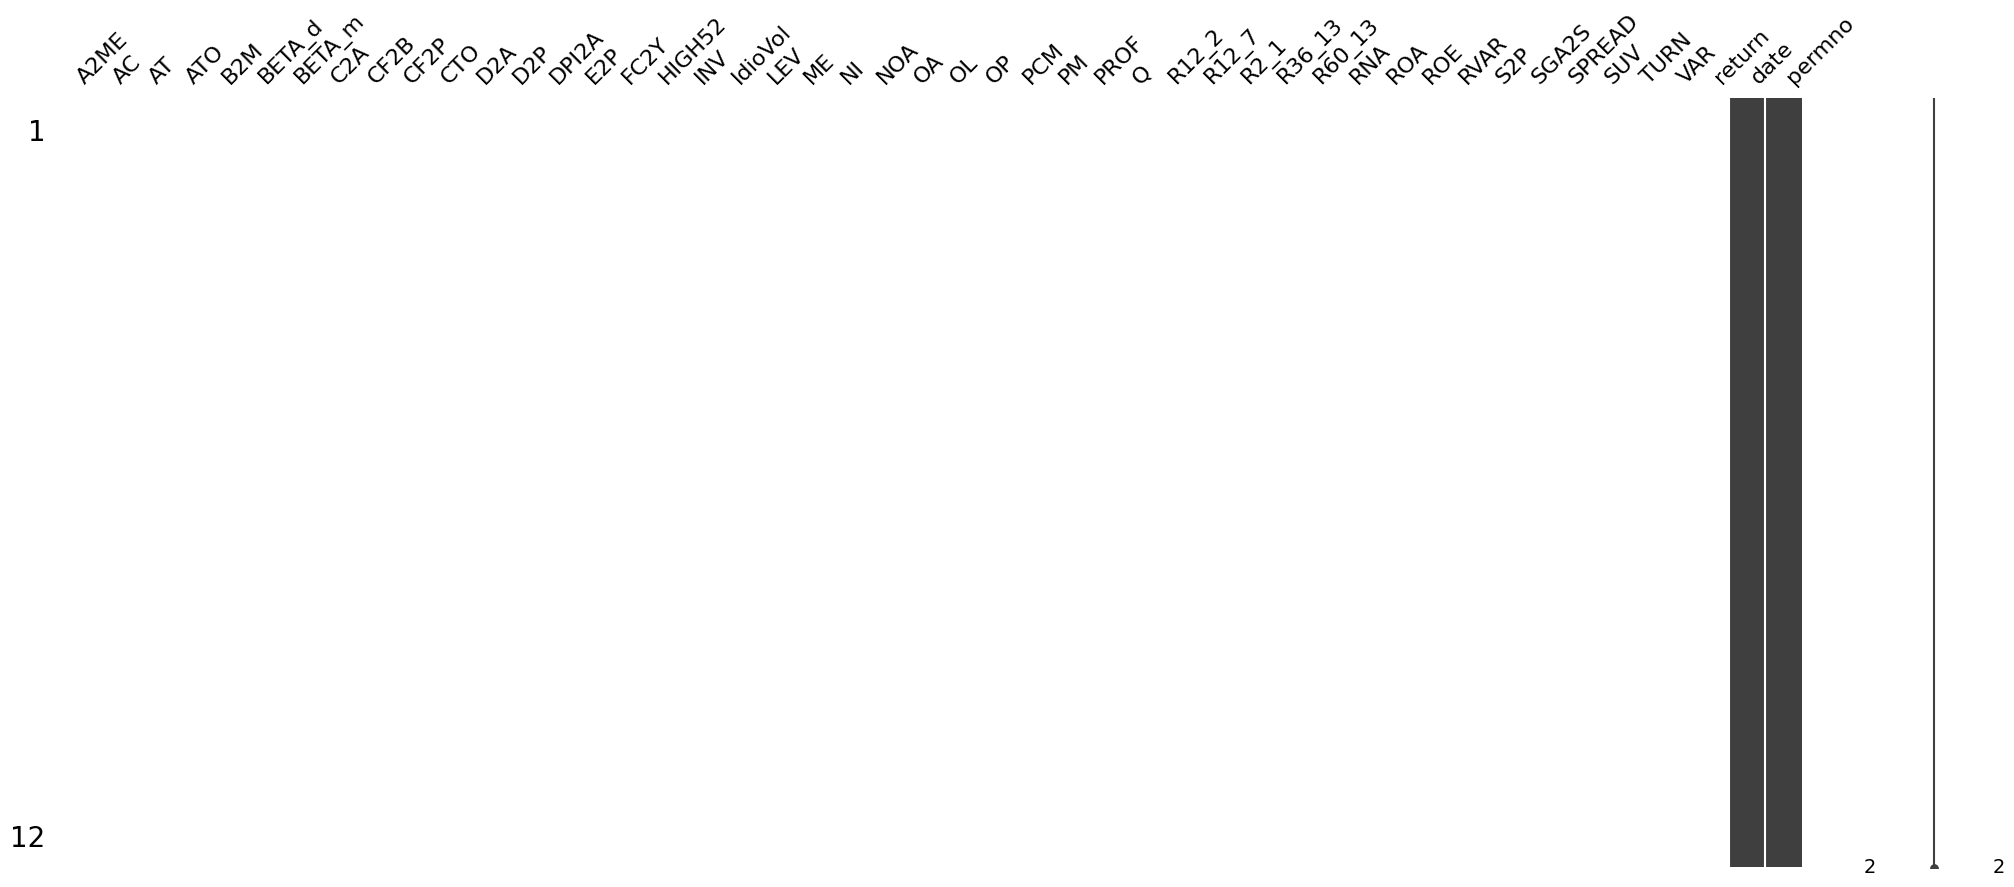

In [19]:
msno.matrix(asset_data)

In [20]:
asset_data = data.query('permno == 12373.0')
asset_data

,A2ME,AC,AT,ATO,B2M,BETA_d,BETA_m,C2A,CF2B,CF2P,...,RVAR,S2P,SGA2S,SPREAD,SUV,TURN,VAR,return,date,permno
175,0.091377,NaN,0.330110,-0.290136,0.084517,0.437262,0.124485,-0.005634,-0.328305,0.258959,...,0.054109,-0.189909,-0.362751,-0.326440,-0.248974,-0.053670,-0.263802,-0.040379,20200131.0,12373.0
4770,0.105005,NaN,0.330230,-0.289977,0.100589,0.438272,0.096323,-0.005516,-0.328915,0.261554,...,-0.208152,-0.175762,-0.363213,-0.330067,-0.428037,-0.204111,-0.322286,-0.113412,20200229.0,12373.0
9362,0.211215,NaN,0.334980,-0.303419,0.344406,0.447755,0.292282,0.007905,-0.162042,0.325829,...,-0.306895,-0.079000,-0.302788,0.081062,0.385404,0.111669,0.116399,-0.531702,20200331.0,12373.0
13949,0.187717,NaN,0.334817,-0.304277,0.300446,0.439936,0.217879,0.006429,-0.167163,0.306203,...,-0.008675,-0.121709,-0.302553,0.004671,0.364251,0.145269,0.116863,0.072051,20200430.0,12373.0
18531,0.210350,NaN,0.335026,-0.304134,0.331762,0.440797,0.188113,0.005821,-0.164596,0.325168,...,-0.036214,-0.095220,-0.302976,-0.033701,0.183523,0.147637,0.153356,-0.064808,20200531.0,12373.0
23104,0.221854,NaN,0.335455,-0.318228,0.333497,0.382732,0.186381,0.000979,-0.209140,0.325276,...,-0.047412,-0.138350,-0.254623,0.031691,0.339467,0.232839,0.024349,0.025666,20200630.0,12373.0
27689,0.229039,NaN,0.334887,-0.318021,0.317847,0.381043,0.184538,-0.004416,-0.209551,0.329520,...,-0.179030,-0.135737,-0.255000,-0.183985,0.050619,0.010248,-0.002880,0.023869,20200731.0,12373.0
32288,0.222975,NaN,0.334806,-0.318458,0.292713,0.386704,0.201464,-0.005891,-0.210145,0.320399,...,-0.173026,-0.147523,-0.256471,-0.070275,-0.046290,-0.048196,-0.162114,0.111299,20200831.0,12373.0
36901,0.222168,NaN,0.332968,-0.324880,0.304688,0.387295,0.198782,-0.009632,-0.241999,0.326810,...,-0.216727,-0.164464,-0.258601,-0.114353,0.161046,0.010824,-0.243626,-0.025546,20200930.0,12373.0
41549,0.208944,NaN,0.333089,-0.325878,0.283480,0.366686,0.180140,-0.014397,-0.244254,0.315622,...,-0.240794,-0.177854,-0.258239,-0.164422,0.016168,-0.040409,-0.258832,0.079688,20201031.0,12373.0


<Axes: >

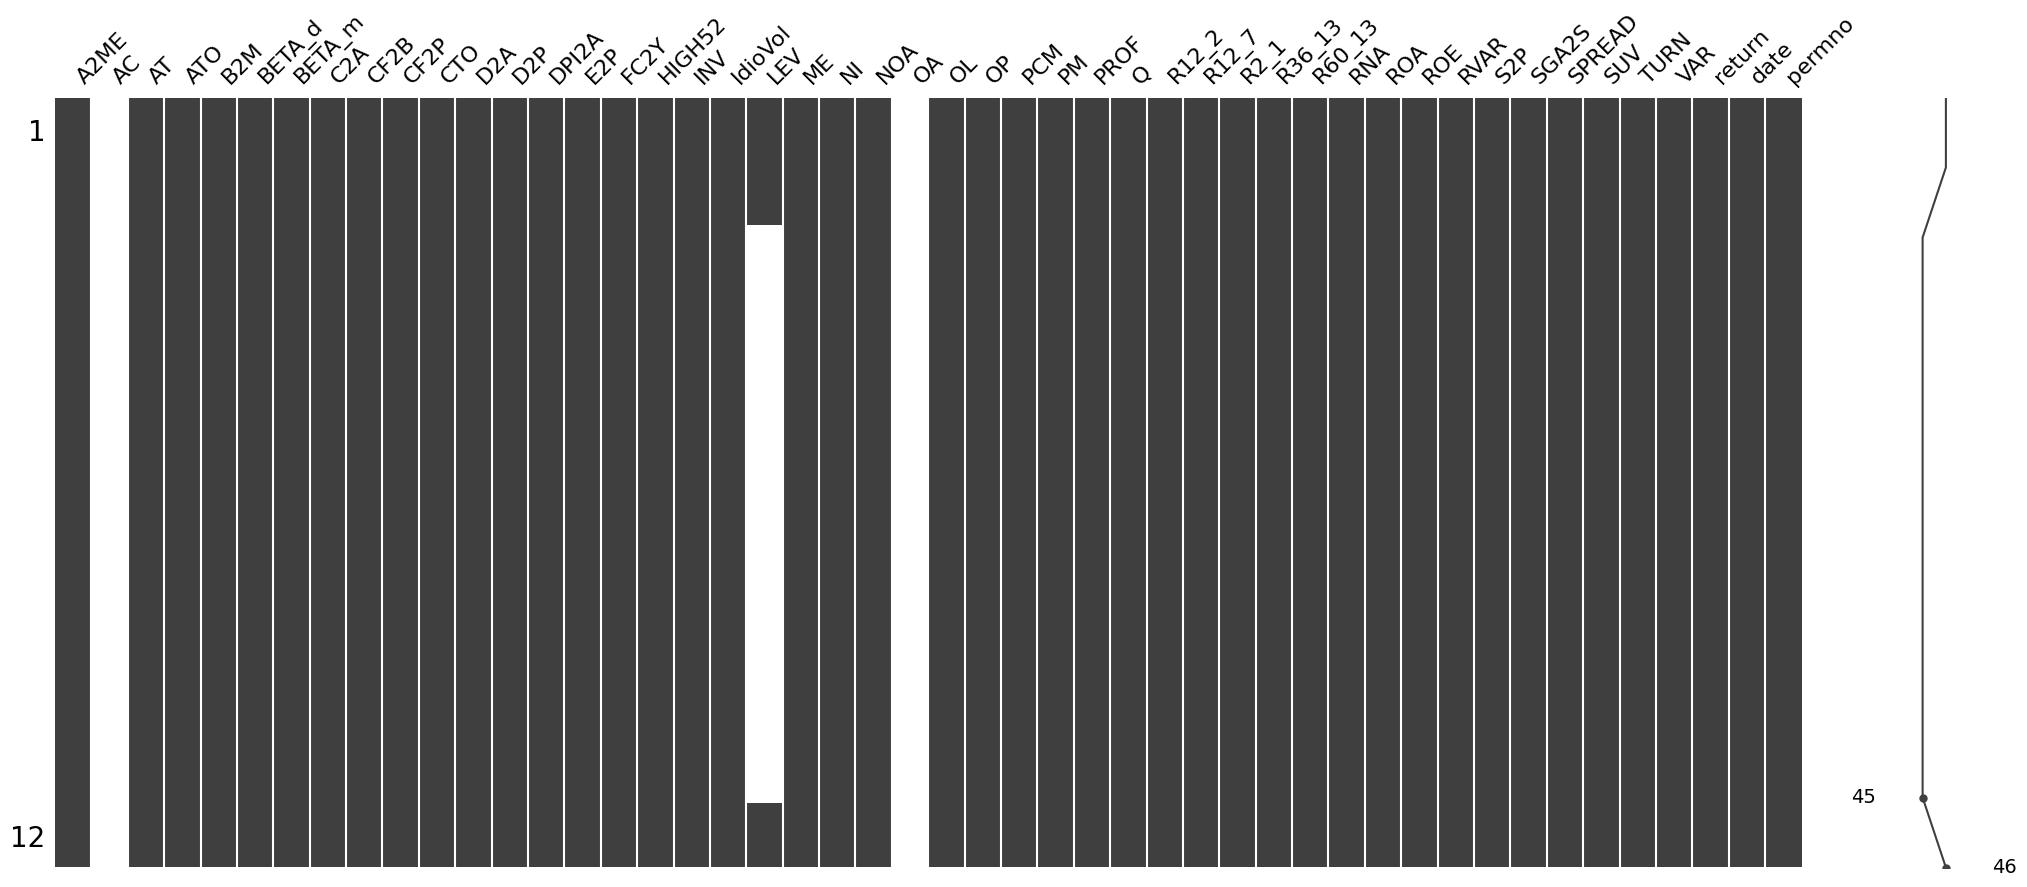

In [21]:
msno.matrix(asset_data)

In [22]:
asset_lev = (asset_data['LEV']).replace(np.nan,0).tolist()
# asset_lev = []

In [23]:
asset_lev

[0.24185400353624653,
 0.2424740703263344,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.20980996404725216]

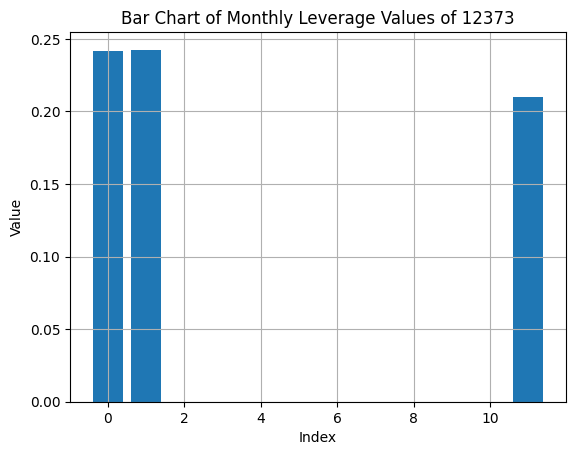

In [24]:

# Generate indices for the x-axis
x_indices = range(len(asset_lev))

# Create a bar chart
plt.bar(x_indices, asset_lev)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Chart of Monthly Leverage Values of 12373')
plt.grid()

# Show the chart
plt.show()

Data Imputation

In [25]:
raw_chars, chars, date_vals, Ns = get_data_panel(data, N_column_name='permno', start_date=None)

In [26]:
raw_chars.shape

(12, 4954, 46)

In [27]:
print(chars)
print(date_vals)
print(Ns)

['A2ME' 'AC' 'AT' 'ATO' 'B2M' 'BETA_d' 'BETA_m' 'C2A' 'CF2B' 'CF2P' 'CTO'
 'D2A' 'D2P' 'DPI2A' 'E2P' 'FC2Y' 'HIGH52' 'INV' 'IdioVol' 'LEV' 'ME' 'NI'
 'NOA' 'OA' 'OL' 'OP' 'PCM' 'PM' 'PROF' 'Q' 'R12_2' 'R12_7' 'R2_1'
 'R36_13' 'R60_13' 'RNA' 'ROA' 'ROE' 'RVAR' 'S2P' 'SGA2S' 'SPREAD' 'SUV'
 'TURN' 'VAR' 'return']
[np.float64(20200131.0), np.float64(20200229.0), np.float64(20200331.0), np.float64(20200430.0), np.float64(20200531.0), np.float64(20200630.0), np.float64(20200731.0), np.float64(20200831.0), np.float64(20200930.0), np.float64(20201031.0), np.float64(20201130.0), np.float64(20201231.0)]
[10026. 10028. 10032. ... 20180. 20181. 85399.]


In [100]:
raw_chars.shape

(12, 4954, 46)

In [28]:
raw_chars

array([[[-3.41989221e-01,  7.32745036e-02, -1.22399021e-04, ...,
         -2.42648817e-02, -8.73739798e-02, -1.00016000e-01],
        [-2.84909358e-01,  3.72675701e-01, -4.26805386e-01, ...,
         -9.09634234e-02,  2.81565050e-01,  6.07407000e-01],
        [-3.84615385e-02, -3.38796092e-02,  1.19583843e-01, ...,
          5.74946211e-02, -2.53960634e-01, -7.56430000e-02],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-3.49362120e-01,  7.55758914e-02,  2.44977952e-04, ...,
         -1.14005736e-01, -2.04130644e-01, -3.02700000e-02],
        [-3.39303238e-01,  3.73461660e-01, -4.26751592e-01, ...,
          1.19024857e-01,  3.12199808e

In [29]:
rank_chars = percentile_rank_panel(raw_chars) # transform the data by using quantile rank

In [30]:
rank_chars

array([[[0.15801078, 0.5732745 , 0.4998776 , ..., 0.47573512,
         0.41262602, 0.25036179],
        [0.21509064, 0.8726757 , 0.07319461, ..., 0.40903658,
         0.78156505, 0.98914616],
        [0.46153846, 0.46612039, 0.61958384, ..., 0.55749462,
         0.24603937, 0.33405692],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.15063788, 0.57557589, 0.50024498, ..., 0.38599426,
         0.29586936, 0.73596724],
        [0.16069676, 0.87346166, 0.07324841, ..., 0.61902486,
         0.81219981, 0.96940496],
        [0.45191364, 0.46954875, 0.61954924, ..., 0.37165392,
         0.24951969, 0.59672368],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [   

In [60]:
impute_model = Imputer(rank_chars)
em_imputed_rank_chars = impute_model.impute_with_em() # too expensive
xs_imputed_rank_chars = impute_model.impute_with_xs()
bxs_imputed_rank_chars = impute_model.impute_with_b_xs()

In [61]:
xs_imputed_rank_chars

array([[[0.20822783, 0.64902574, 0.46953835, ..., 0.44168483,
         0.39046397, 0.26496292],
        [0.30828259, 0.96362808, 0.05275132, ..., 0.36552641,
         0.72669628, 0.9836687 ],
        [0.46666376, 0.50222931, 0.61985422, ..., 0.51054326,
         0.28390804, 0.33804292],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.18422869, 0.63417251, 0.46337275, ..., 0.36942542,
         0.32567041, 0.72580129],
        [0.25993726, 0.97801116, 0.05088402, ..., 0.5702007 ,
         0.76405893, 0.96586003],
        [0.44717214, 0.5002107 , 0.61571143, ..., 0.36104474,
         0.25603481, 0.59274642],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [   

In [62]:
em_imputed_raw_chars = invert_cross_sectional_percentiles_with_knn(em_imputed_rank_chars, raw_chars)
xs_imputed_raw_chars = invert_cross_sectional_percentiles_with_knn(xs_imputed_rank_chars, raw_chars)
bxs_imputed_raw_chars = invert_cross_sectional_percentiles_with_knn(bxs_imputed_rank_chars, raw_chars)

In [48]:
raw_chars

array([[[-3.41989221e-01,  7.32745036e-02, -1.22399021e-04, ...,
         -2.42648817e-02, -8.73739798e-02, -1.00016000e-01],
        [-2.84909358e-01,  3.72675701e-01, -4.26805386e-01, ...,
         -9.09634234e-02,  2.81565050e-01,  6.07407000e-01],
        [-3.84615385e-02, -3.38796092e-02,  1.19583843e-01, ...,
          5.74946211e-02, -2.53960634e-01, -7.56430000e-02],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-3.49362120e-01,  7.55758914e-02,  2.44977952e-04, ...,
         -1.14005736e-01, -2.04130644e-01, -3.02700000e-02],
        [-3.39303238e-01,  3.73461660e-01, -4.26751592e-01, ...,
          1.19024857e-01,  3.12199808e

In [63]:
xs_imputed_raw_chars

array([[[-3.41989221e-01,  7.32745036e-02, -1.22399021e-04, ...,
         -2.42648817e-02, -8.73739798e-02, -1.00016000e-01],
        [-2.84909358e-01,  3.72675701e-01, -4.26805386e-01, ...,
         -9.09634234e-02,  2.81565050e-01,  6.07407000e-01],
        [-3.84615385e-02, -3.38796092e-02,  1.19583843e-01, ...,
          5.74946211e-02, -2.53960634e-01, -7.56430000e-02],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-3.49362120e-01,  7.55758914e-02,  2.44977952e-04, ...,
         -1.14005736e-01, -2.04130644e-01, -3.02700000e-02],
        [-3.39303238e-01,  3.73461660e-01, -4.26751592e-01, ...,
          1.19024857e-01,  3.12199808e

In [64]:
em_new_data = get_dataframe_from_panel(em_imputed_raw_chars, chars, date_vals, Ns, N_column_name='permno')
xs_new_data = get_dataframe_from_panel(xs_imputed_raw_chars, chars, date_vals, Ns, N_column_name='permno')
bxs_new_data = get_dataframe_from_panel(bxs_imputed_raw_chars, chars, date_vals, Ns, N_column_name='permno')

In [65]:
em_new_data

,date,permno,A2ME,AC,AT,ATO,B2M,BETA_d,BETA_m,C2A,...,ROA,ROE,RVAR,S2P,SGA2S,SPREAD,SUV,TURN,VAR,return
0,20200131.0,10026.0,-0.341989,0.073275,-0.000122,0.269502,-0.170260,-0.276312,-0.418199,0.170995,...,0.390099,0.185316,-0.318993,-0.056347,-0.171998,-0.265957,0.178494,-0.024265,-0.087374,-0.100016
1,20200131.0,10028.0,-0.284909,0.372676,-0.426805,0.400604,-0.264821,-0.394166,-0.489295,-0.007839,...,0.398709,0.400000,0.231743,0.271176,-0.250800,0.301578,-0.290490,-0.090963,0.281565,0.607407
2,20200131.0,10032.0,-0.038462,-0.033880,0.119584,0.413689,-0.045076,0.087804,-0.076997,0.039441,...,0.272601,0.232658,-0.201374,0.294991,-0.460744,-0.100765,-0.376418,0.057495,-0.253961,-0.075643
3,20200131.0,10044.0,-0.221705,0.043019,-0.421665,0.262204,-0.067859,-0.462474,-0.349026,0.177119,...,0.372879,0.231139,-0.397325,0.102259,-0.225502,-0.244442,0.244871,-0.209539,-0.393663,-0.098592
4,20200131.0,10051.0,-0.077658,-0.493697,-0.041983,0.290891,-0.438021,0.035620,0.181856,-0.123224,...,0.083945,-0.370127,-0.066643,0.245642,-0.319715,-0.011834,-0.131909,0.046259,-0.186270,-0.115176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50770,20201231.0,20178.0,0.199541,-0.013079,-0.342512,-0.007132,0.241117,-0.331781,-0.254249,-0.058065,...,-0.007945,0.007046,0.118246,0.119662,0.050103,-0.099678,0.016862,-0.317219,-0.034284,0.016080
50771,20201231.0,20179.0,0.496374,-0.039237,-0.150725,0.096536,0.432560,-0.161816,-0.255328,-0.244913,...,0.143516,0.160774,0.332749,0.338133,-0.096512,-0.477901,-0.220609,-0.394337,0.280258,0.033846
50772,20201231.0,20180.0,0.056200,0.074850,-0.448309,-0.101375,0.068044,-0.061118,0.178716,0.160050,...,-0.382624,-0.280425,0.401988,-0.011917,0.220958,0.467311,0.197424,0.454650,0.433042,0.022814
50773,20201231.0,20181.0,-0.021392,0.147652,-0.135507,-0.475293,0.246193,-0.244470,-0.117480,-0.455583,...,-0.189646,-0.107481,-0.018596,-0.423535,0.489063,-0.022790,0.178689,0.375000,0.067188,0.115396


<Axes: >

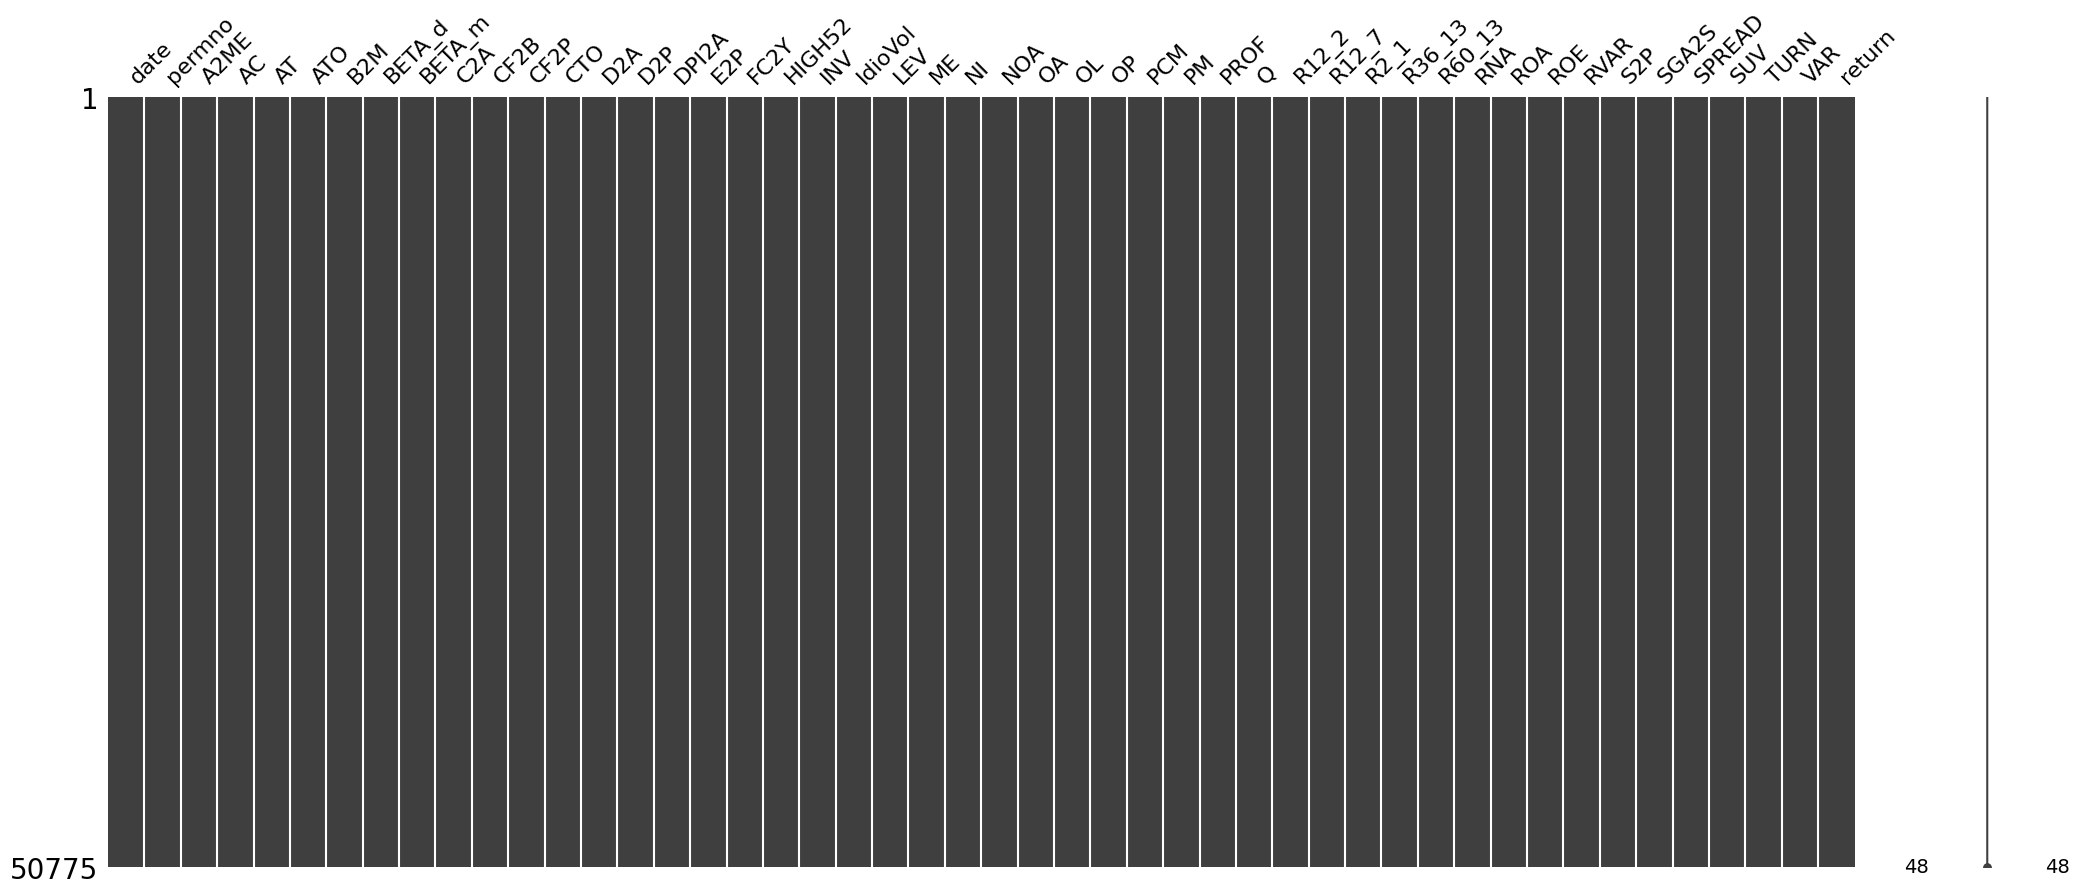

In [66]:
msno.matrix(xs_new_data)

In [68]:
asset_data = xs_new_data.query('permno == 12373.0')
asset_data

,date,permno,A2ME,AC,AT,ATO,B2M,BETA_d,BETA_m,C2A,...,ROA,ROE,RVAR,S2P,SGA2S,SPREAD,SUV,TURN,VAR,return
160,20200131.0,12373.0,0.091377,-0.084683,0.330110,-0.290136,0.084517,0.437262,0.124485,-0.005634,...,0.061408,-0.037722,0.054109,-0.189909,-0.362751,-0.326440,-0.248974,-0.053670,-0.263802,-0.040379
4348,20200229.0,12373.0,0.105005,-0.111007,0.330230,-0.289977,0.100589,0.438272,0.096323,-0.005516,...,0.061230,-0.038481,-0.208152,-0.175762,-0.363213,-0.330067,-0.428037,-0.204111,-0.322286,-0.113412
8535,20200331.0,12373.0,0.211215,0.068886,0.334980,-0.303419,0.344406,0.447755,0.292282,0.007905,...,0.060795,-0.037971,-0.306895,-0.079000,-0.302788,0.081062,0.385404,0.111669,0.116399,-0.531702
12719,20200430.0,12373.0,0.187717,0.074895,0.334817,-0.304277,0.300446,0.439936,0.217879,0.006429,...,-0.022256,-0.057522,-0.008675,-0.121709,-0.302553,0.004671,0.364251,0.145269,0.116863,0.072051
16897,20200531.0,12373.0,0.210350,0.116801,0.335026,-0.304134,0.331762,0.440797,0.188113,0.005821,...,-0.025419,-0.059848,-0.036214,-0.095220,-0.302976,-0.033701,0.183523,0.147637,0.153356,-0.064808
21068,20200630.0,12373.0,0.221854,0.013606,0.335455,-0.318228,0.333497,0.382732,0.186381,0.000979,...,-0.026034,-0.059326,-0.047412,-0.138350,-0.254623,0.031691,0.339467,0.232839,0.024349,0.025666
25252,20200731.0,12373.0,0.229039,-0.001950,0.334887,-0.318021,0.317847,0.381043,0.184538,-0.004416,...,-0.099848,-0.115580,-0.179030,-0.135737,-0.255000,-0.183985,0.050619,0.010248,-0.002880,0.023869
29451,20200831.0,12373.0,0.222975,-0.041840,0.334806,-0.318458,0.292713,0.386704,0.201464,-0.005891,...,-0.094484,-0.109551,-0.173026,-0.147523,-0.256471,-0.070275,-0.046290,-0.048196,-0.162114,0.111299
33666,20200930.0,12373.0,0.222168,0.351143,0.332968,-0.324880,0.304688,0.387295,0.198782,-0.009632,...,-0.092517,-0.107893,-0.216727,-0.164464,-0.258601,-0.114353,0.161046,0.010824,-0.243626,-0.025546
37917,20201031.0,12373.0,0.208944,0.368532,0.333089,-0.325878,0.283480,0.366686,0.180140,-0.014397,...,-0.082295,-0.099186,-0.240794,-0.177854,-0.258239,-0.164422,0.016168,-0.040409,-0.258832,0.079688


<Axes: >

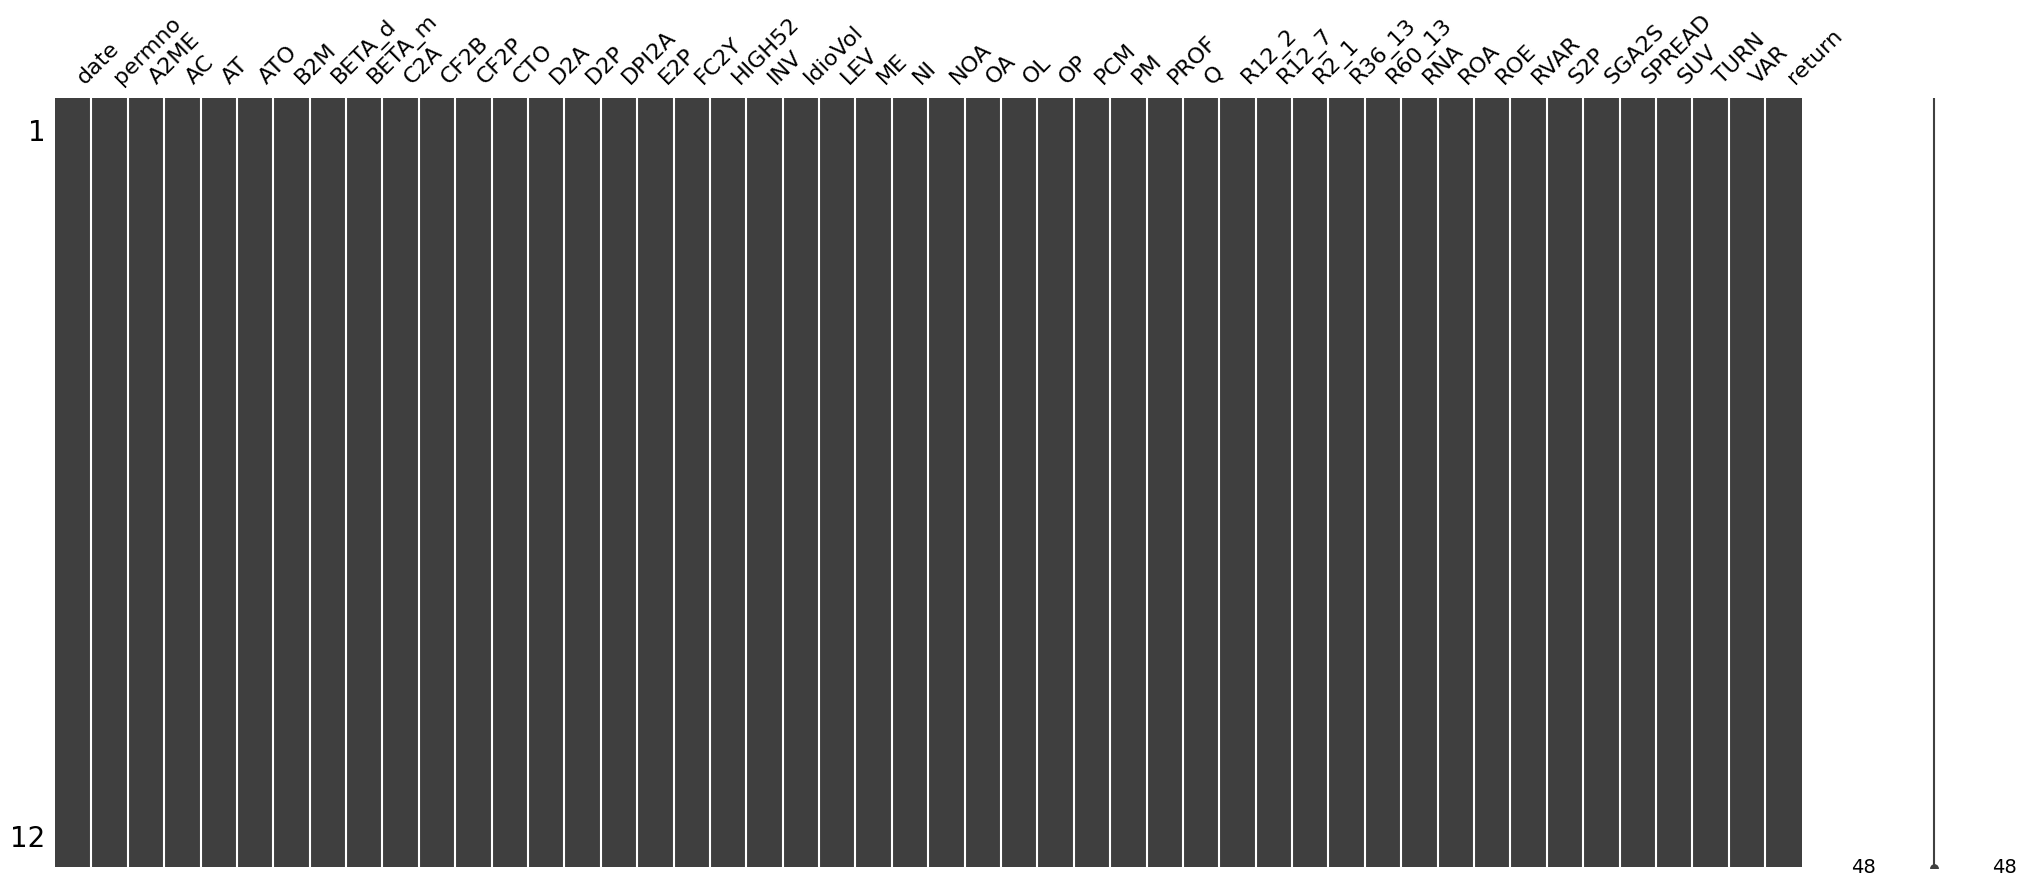

In [69]:
msno.matrix(asset_data)

In [70]:
asset_lev = (asset_data['LEV']).replace(np.nan,0).tolist()
# asset_lev = []

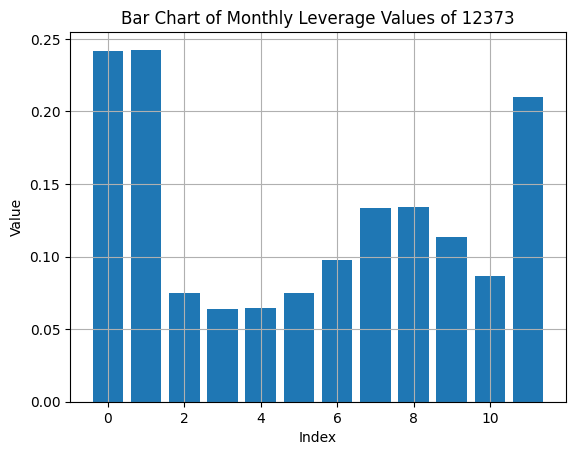

In [71]:

# Generate indices for the x-axis
x_indices = range(len(asset_lev))

# Create a bar chart
plt.bar(x_indices, asset_lev)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Chart of Monthly Leverage Values of 12373')
plt.grid()

# Show the chart
plt.show()

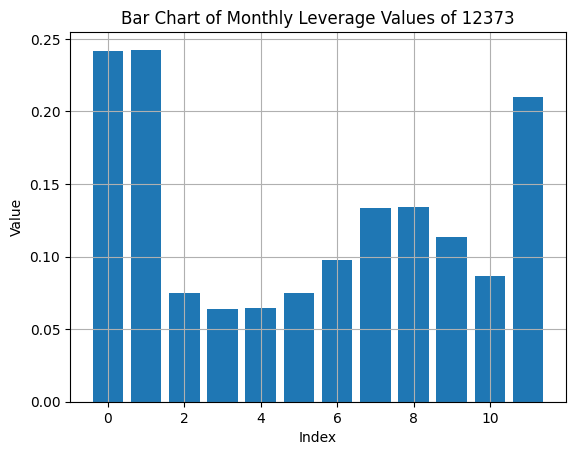

In [43]:

# Generate indices for the x-axis
x_indices = range(len(asset_lev))

# Create a bar chart
plt.bar(x_indices, asset_lev)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Chart of Monthly Leverage Values of 12373')
plt.grid()

# Show the chart
plt.show()

In [44]:
# save the data
# em_raw = imputed_raw_chars.copy()
# em_data = new_data.copy()

Compare Imputation across different approaches

In [79]:
asset_data = data.query('permno == 12373.0')
xs_asset_data = xs_new_data.query('permno == 12373.0')
bxs_asset_data = bxs_new_data.query('permno == 12373.0')
em_asset_data = em_new_data.query('permno == 12373.0')

In [80]:
asset_data

,A2ME,AC,AT,ATO,B2M,BETA_d,BETA_m,C2A,CF2B,CF2P,...,RVAR,S2P,SGA2S,SPREAD,SUV,TURN,VAR,return,date,permno
175,0.091377,NaN,0.330110,-0.290136,0.084517,0.437262,0.124485,-0.005634,-0.328305,0.258959,...,0.054109,-0.189909,-0.362751,-0.326440,-0.248974,-0.053670,-0.263802,-0.040379,20200131.0,12373.0
4770,0.105005,NaN,0.330230,-0.289977,0.100589,0.438272,0.096323,-0.005516,-0.328915,0.261554,...,-0.208152,-0.175762,-0.363213,-0.330067,-0.428037,-0.204111,-0.322286,-0.113412,20200229.0,12373.0
9362,0.211215,NaN,0.334980,-0.303419,0.344406,0.447755,0.292282,0.007905,-0.162042,0.325829,...,-0.306895,-0.079000,-0.302788,0.081062,0.385404,0.111669,0.116399,-0.531702,20200331.0,12373.0
13949,0.187717,NaN,0.334817,-0.304277,0.300446,0.439936,0.217879,0.006429,-0.167163,0.306203,...,-0.008675,-0.121709,-0.302553,0.004671,0.364251,0.145269,0.116863,0.072051,20200430.0,12373.0
18531,0.210350,NaN,0.335026,-0.304134,0.331762,0.440797,0.188113,0.005821,-0.164596,0.325168,...,-0.036214,-0.095220,-0.302976,-0.033701,0.183523,0.147637,0.153356,-0.064808,20200531.0,12373.0
23104,0.221854,NaN,0.335455,-0.318228,0.333497,0.382732,0.186381,0.000979,-0.209140,0.325276,...,-0.047412,-0.138350,-0.254623,0.031691,0.339467,0.232839,0.024349,0.025666,20200630.0,12373.0
27689,0.229039,NaN,0.334887,-0.318021,0.317847,0.381043,0.184538,-0.004416,-0.209551,0.329520,...,-0.179030,-0.135737,-0.255000,-0.183985,0.050619,0.010248,-0.002880,0.023869,20200731.0,12373.0
32288,0.222975,NaN,0.334806,-0.318458,0.292713,0.386704,0.201464,-0.005891,-0.210145,0.320399,...,-0.173026,-0.147523,-0.256471,-0.070275,-0.046290,-0.048196,-0.162114,0.111299,20200831.0,12373.0
36901,0.222168,NaN,0.332968,-0.324880,0.304688,0.387295,0.198782,-0.009632,-0.241999,0.326810,...,-0.216727,-0.164464,-0.258601,-0.114353,0.161046,0.010824,-0.243626,-0.025546,20200930.0,12373.0
41549,0.208944,NaN,0.333089,-0.325878,0.283480,0.366686,0.180140,-0.014397,-0.244254,0.315622,...,-0.240794,-0.177854,-0.258239,-0.164422,0.016168,-0.040409,-0.258832,0.079688,20201031.0,12373.0


In [81]:
em_asset_data

,date,permno,A2ME,AC,AT,ATO,B2M,BETA_d,BETA_m,C2A,...,ROA,ROE,RVAR,S2P,SGA2S,SPREAD,SUV,TURN,VAR,return
160,20200131.0,12373.0,0.091377,-0.037346,0.330110,-0.290136,0.084517,0.437262,0.124485,-0.005634,...,0.061408,-0.037722,0.054109,-0.189909,-0.362751,-0.326440,-0.248974,-0.053670,-0.263802,-0.040379
4348,20200229.0,12373.0,0.105005,-0.027611,0.330230,-0.289977,0.100589,0.438272,0.096323,-0.005516,...,0.061230,-0.038481,-0.208152,-0.175762,-0.363213,-0.330067,-0.428037,-0.204111,-0.322286,-0.113412
8535,20200331.0,12373.0,0.211215,0.120121,0.334980,-0.303419,0.344406,0.447755,0.292282,0.007905,...,0.060795,-0.037971,-0.306895,-0.079000,-0.302788,0.081062,0.385404,0.111669,0.116399,-0.531702
12719,20200430.0,12373.0,0.187717,0.111111,0.334817,-0.304277,0.300446,0.439936,0.217879,0.006429,...,-0.022256,-0.057522,-0.008675,-0.121709,-0.302553,0.004671,0.364251,0.145269,0.116863,0.072051
16897,20200531.0,12373.0,0.210350,0.141653,0.335026,-0.304134,0.331762,0.440797,0.188113,0.005821,...,-0.025419,-0.059848,-0.036214,-0.095220,-0.302976,-0.033701,0.183523,0.147637,0.153356,-0.064808
21068,20200630.0,12373.0,0.221854,0.125351,0.335455,-0.318228,0.333497,0.382732,0.186381,0.000979,...,-0.026034,-0.059326,-0.047412,-0.138350,-0.254623,0.031691,0.339467,0.232839,0.024349,0.025666
25252,20200731.0,12373.0,0.229039,0.116875,0.334887,-0.318021,0.317847,0.381043,0.184538,-0.004416,...,-0.099848,-0.115580,-0.179030,-0.135737,-0.255000,-0.183985,0.050619,0.010248,-0.002880,0.023869
29451,20200831.0,12373.0,0.222975,0.123905,0.334806,-0.318458,0.292713,0.386704,0.201464,-0.005891,...,-0.094484,-0.109551,-0.173026,-0.147523,-0.256471,-0.070275,-0.046290,-0.048196,-0.162114,0.111299
33666,20200930.0,12373.0,0.222168,0.131396,0.332968,-0.324880,0.304688,0.387295,0.198782,-0.009632,...,-0.092517,-0.107893,-0.216727,-0.164464,-0.258601,-0.114353,0.161046,0.010824,-0.243626,-0.025546
37917,20201031.0,12373.0,0.208944,0.156013,0.333089,-0.325878,0.283480,0.366686,0.180140,-0.014397,...,-0.082295,-0.099186,-0.240794,-0.177854,-0.258239,-0.164422,0.016168,-0.040409,-0.258832,0.079688


In [82]:
bxs_asset_data

,date,permno,A2ME,AC,AT,ATO,B2M,BETA_d,BETA_m,C2A,...,ROA,ROE,RVAR,S2P,SGA2S,SPREAD,SUV,TURN,VAR,return
160,20200131.0,12373.0,0.091377,-0.037031,0.330110,-0.290136,0.084517,0.437262,0.124485,-0.005634,...,0.061408,-0.037722,0.054109,-0.189909,-0.362751,-0.326440,-0.248974,-0.053670,-0.263802,-0.040379
4348,20200229.0,12373.0,0.105005,-0.059798,0.330230,-0.289977,0.100589,0.438272,0.096323,-0.005516,...,0.061230,-0.038481,-0.208152,-0.175762,-0.363213,-0.330067,-0.428037,-0.204111,-0.322286,-0.113412
8535,20200331.0,12373.0,0.211215,0.077594,0.334980,-0.303419,0.344406,0.447755,0.292282,0.007905,...,0.060795,-0.037971,-0.306895,-0.079000,-0.302788,0.081062,0.385404,0.111669,0.116399,-0.531702
12719,20200430.0,12373.0,0.187717,0.079048,0.334817,-0.304277,0.300446,0.439936,0.217879,0.006429,...,-0.022256,-0.057522,-0.008675,-0.121709,-0.302553,0.004671,0.364251,0.145269,0.116863,0.072051
16897,20200531.0,12373.0,0.210350,0.121304,0.335026,-0.304134,0.331762,0.440797,0.188113,0.005821,...,-0.025419,-0.059848,-0.036214,-0.095220,-0.302976,-0.033701,0.183523,0.147637,0.153356,-0.064808
21068,20200630.0,12373.0,0.221854,0.029816,0.335455,-0.318228,0.333497,0.382732,0.186381,0.000979,...,-0.026034,-0.059326,-0.047412,-0.138350,-0.254623,0.031691,0.339467,0.232839,0.024349,0.025666
25252,20200731.0,12373.0,0.229039,0.020000,0.334887,-0.318021,0.317847,0.381043,0.184538,-0.004416,...,-0.099848,-0.115580,-0.179030,-0.135737,-0.255000,-0.183985,0.050619,0.010248,-0.002880,0.023869
29451,20200831.0,12373.0,0.222975,-0.000313,0.334806,-0.318458,0.292713,0.386704,0.201464,-0.005891,...,-0.094484,-0.109551,-0.173026,-0.147523,-0.256471,-0.070275,-0.046290,-0.048196,-0.162114,0.111299
33666,20200930.0,12373.0,0.222168,0.306380,0.332968,-0.324880,0.304688,0.387295,0.198782,-0.009632,...,-0.092517,-0.107893,-0.216727,-0.164464,-0.258601,-0.114353,0.161046,0.010824,-0.243626,-0.025546
37917,20201031.0,12373.0,0.208944,0.338291,0.333089,-0.325878,0.283480,0.366686,0.180140,-0.014397,...,-0.082295,-0.099186,-0.240794,-0.177854,-0.258239,-0.164422,0.016168,-0.040409,-0.258832,0.079688


In [83]:
# plot the AC and LEV values for the four datasets


In [97]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_comparison(column_name, asset_data, em_asset_data, xs_asset_data, bxs_asset_data):
    """
    Plots the values of a given column from four DataFrames as a bar chart for comparison.
    Assumes the column contains 12 elements corresponding to months January to December.
    
    Parameters:
    column_name : str
        The column name to compare.
    asset_data : pd.DataFrame
        First DataFrame.
    em_asset_data : pd.DataFrame
        Second DataFrame.
    xs_asset_data : pd.DataFrame
        Third DataFrame.
    bxs_asset_data : pd.DataFrame
        Fourth DataFrame.
    """
    # List of months for the X-axis
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Ensure the chosen column exists in each DataFrame
    dfs = {
        'Original': asset_data,
        'EM': em_asset_data,
        'XS': xs_asset_data,
        'BXS': bxs_asset_data
    }
    for name, df in dfs.items():
        if column_name not in df.columns:
            raise ValueError(f"The column '{column_name}' is not present in the {name} dataframe.")
        if len(df[column_name]) != 12:
            raise ValueError(f"The column '{column_name}' in {name} must have exactly 12 elements.")

    # Initialize the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Bar width and position offset for grouped bars
    bar_width = 0.2
    offset = -0.3
    
    # Plot each DataFrame's column values
    for i, (label, df) in enumerate(dfs.items()):
        # Get the column values
        values = df[column_name].tolist()
        
        # Add bars to the chart
        ax.bar(
            [x + offset + i * bar_width for x in range(len(months))],
            values,
            width=bar_width,
            label=label
        )
    
    # Customize chart
    ax.set_xticks(range(len(months)))
    ax.set_xticklabels(months)
    ax.set_title(f'Comparison of {column_name} Values Between Original Data and Imputed Data Obtained By Different Approaches', fontweight='bold')
    ax.set_xlabel('Months', fontweight='bold')
    ax.set_ylabel(column_name, fontweight='bold')
    ax.legend()
    
    # Show plot
    plt.grid()
    plt.tight_layout()
    plt.show()

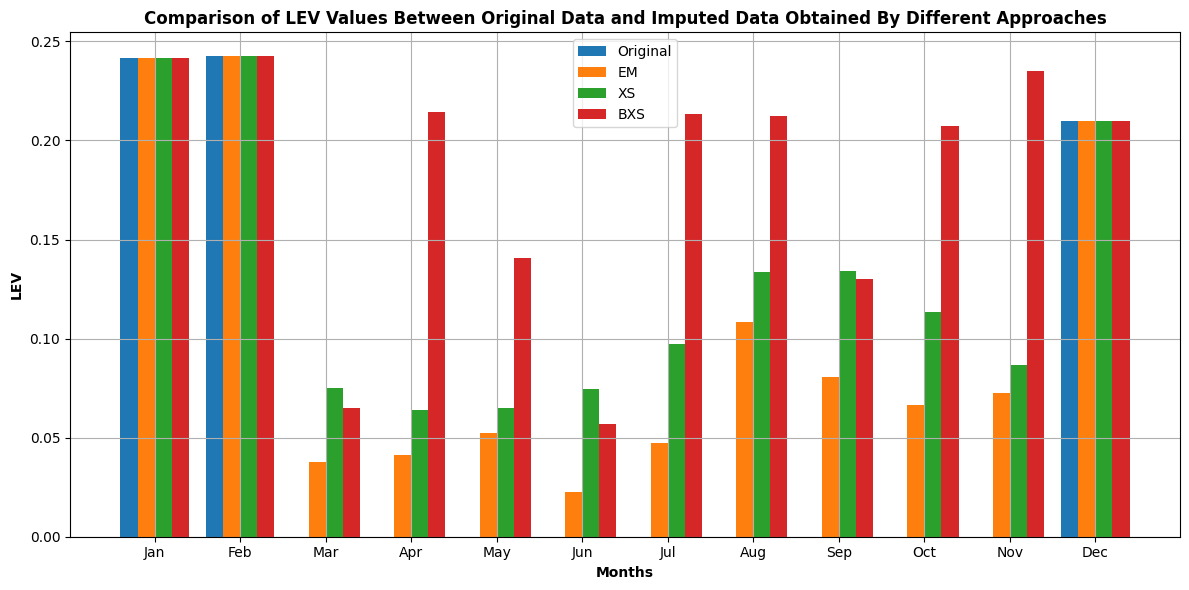

In [98]:
plot_comparison('LEV', asset_data, em_asset_data, xs_asset_data, bxs_asset_data)

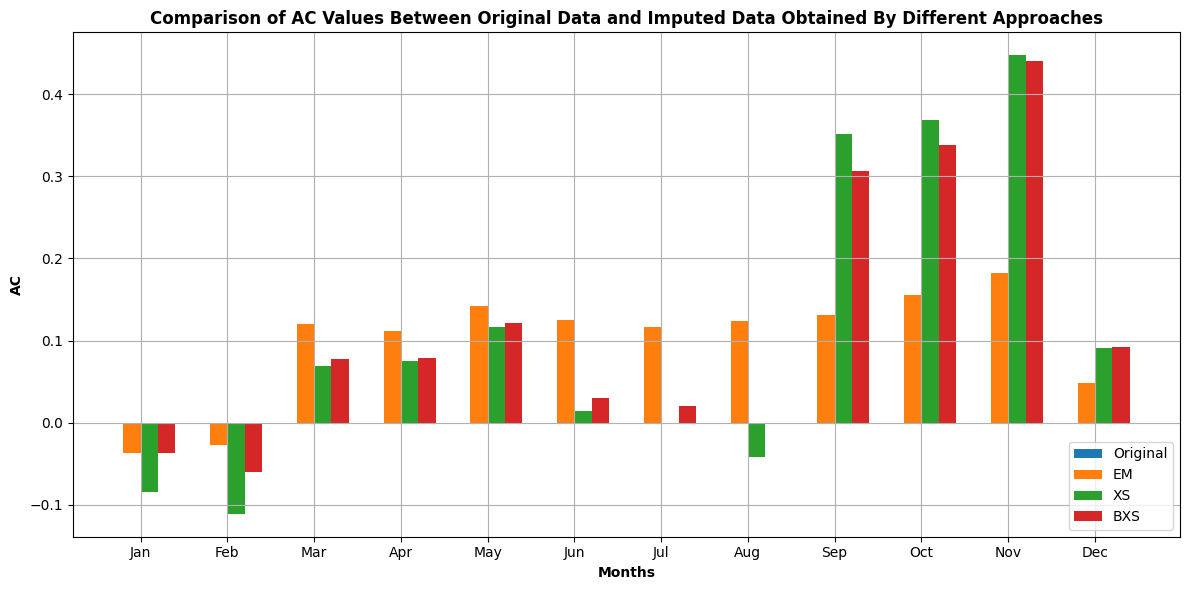

In [99]:
plot_comparison('AC', asset_data, em_asset_data, xs_asset_data, bxs_asset_data)